# TMDB Box Office Prediction EDA + ML

![](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)
[image-source](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)

In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

In this competition, you're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. You can collect other publicly available data to use in your model predictions, but in the spirit of this competition, use only data that would have been available before a movie's release.

## *Kernel in progress, is continuously being updated and extended*

## Preparations - Prerequisities

![](https://images-na.ssl-images-amazon.com/images/I/91HTK796%2BML._SX425_.jpg)
[image-source](https://images-na.ssl-images-amazon.com/images/I/91HTK796%2BML._SX425_.jpg)

### Loading Libraries

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import gc

import warnings
warnings.filterwarnings("ignore")

['train.csv', 'sample_submission.csv', 'test.csv']


### Loading the data

In [51]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
sub_df = pd.read_csv('../input/sample_submission.csv')

### Inspecting the train set

In [52]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


We have a variaty of data, numerical, categorical and even lists of json formats.

In [53]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### Check for NA values in trainset

In [54]:
train_df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

## Exploratory Data Analysis

![](https://prod-discovery.edx-cdn.org/media/course/image/2102f79d-9a44-41e9-9d92-884bec46dc65-ff40350cad17.small.jpg)
[image-source](https://prod-discovery.edx-cdn.org/media/course/image/2102f79d-9a44-41e9-9d92-884bec46dc65-ff40350cad17.small.jpg)

In [55]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

So many columns and features to investigate, lets start by inspecting one by one each feature.

### Univariate Analysis

#### Revenue
Our target variable to be predicted

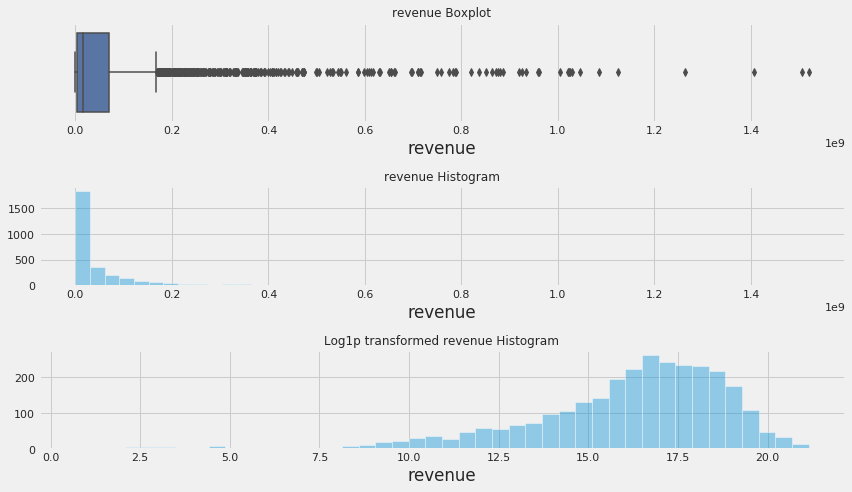

In [56]:
f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.revenue, ax = ax[0])
ax[0].set_title("revenue Boxplot")
sns.distplot(a=train_df.revenue, kde = False, ax = ax[1])
ax[1].set_title("revenue Histogram")
sns.distplot(a=np.log1p(train_df.revenue), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()

train_df["log_revenue"] = np.log1p(train_df.revenue)




#### Budget

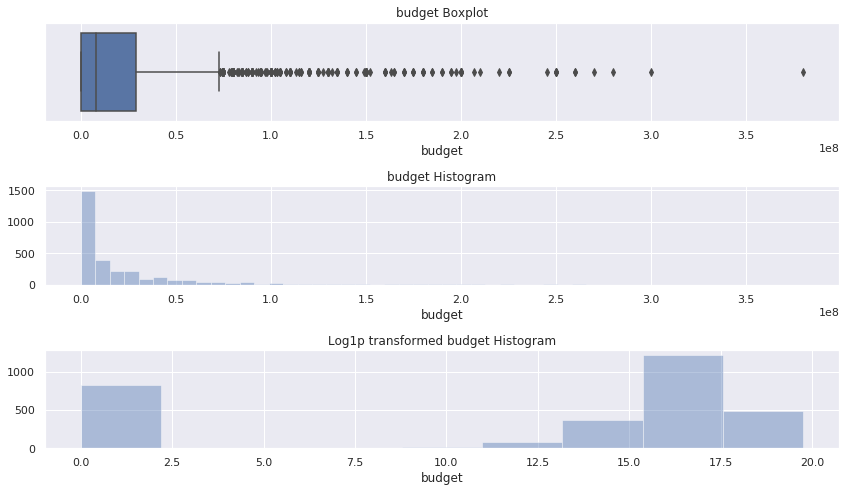

In [57]:
f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.budget, ax = ax[0])
ax[0].set_title("budget Boxplot")
sns.distplot(a=train_df.budget, kde = False, ax = ax[1])
ax[1].set_title("budget Histogram")
sns.distplot(a=np.log1p(train_df.budget), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed budget Histogram")
f.tight_layout()

train_df["log_budget"] = np.log1p(train_df.budget)
test_df["log_budget"] = np.log1p(test_df.budget)

#### Genres

Text(0.5, 1.0, 'Number of films per genre')

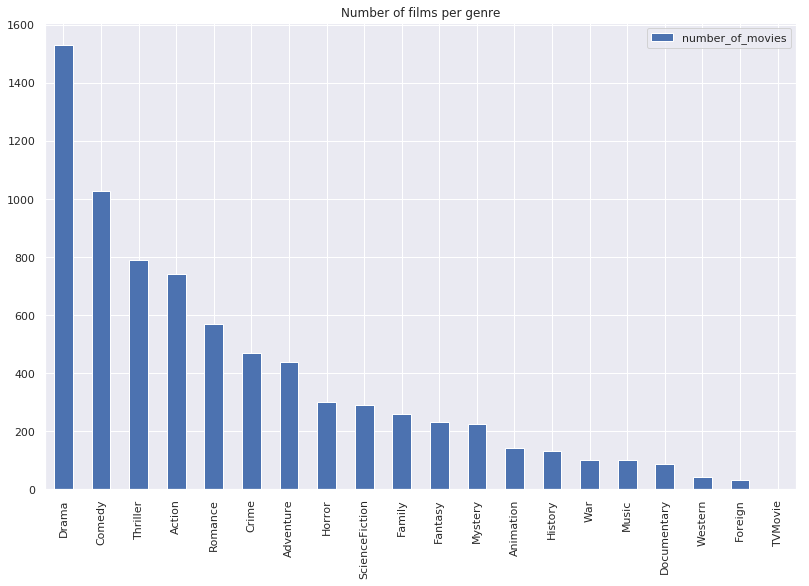

In [58]:
def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

train_df["genres_processed"] = train_df.genres.apply(lambda elem: genres_preprocessing(elem))
test_df["genres_processed"] = test_df.genres.apply(lambda elem: genres_preprocessing(elem))

genres_dict = dict()

for genre in train_df["genres_processed"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar()
plt.title("Number of films per genre")

#### Number of Genres

Text(0.5, 1.0, 'Number of films with more than 1 genre')

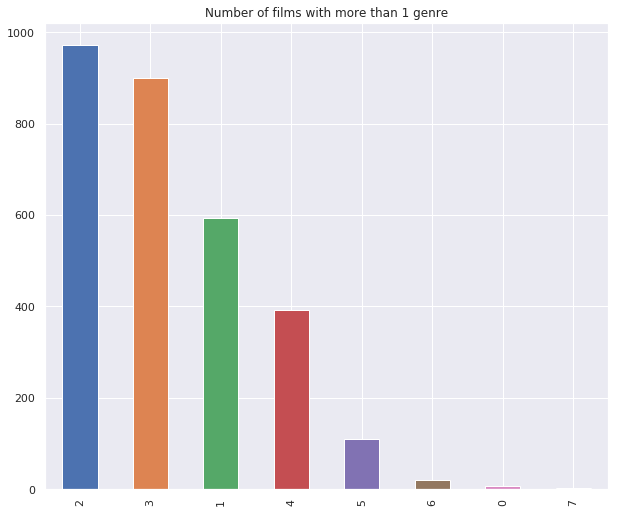

In [59]:
sns.set(rc={'figure.figsize':(9,8)})
train_df['num_genres'] = train_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)
test_df['num_genres'] = test_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)

train_df['num_genres'].value_counts().plot.bar()
plt.title("Number of films with more than 1 genre")

#### isGenre, feature engineering, creating new feature
isDrama, isComedy etc.

In [60]:
genres_df.index.values
for g in genres_df.index.values:
    train_df['isGenre_' + g] = train_df['genres_processed'].apply(lambda x: 1 if g in x else 0)
    test_df['isGenre_' + g] = test_df['genres_processed'].apply(lambda x: 1 if g in x else 0)

In [61]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'log_budget', 'genres_processed', 'num_genres',
       'isGenre_Drama', 'isGenre_Comedy', 'isGenre_Thriller', 'isGenre_Action',
       'isGenre_Romance', 'isGenre_Crime', 'isGenre_Adventure',
       'isGenre_Horror', 'isGenre_ScienceFiction', 'isGenre_Family',
       'isGenre_Fantasy', 'isGenre_Mystery', 'isGenre_Animation',
       'isGenre_History', 'isGenre_War', 'isGenre_Music',
       'isGenre_Documentary', 'isGenre_Western', 'isGenre_Foreign',
       'isGenre_TVMovie'],
      dtype='object')

#### Original Language

Text(0.5, 1.0, 'Number of films per language')

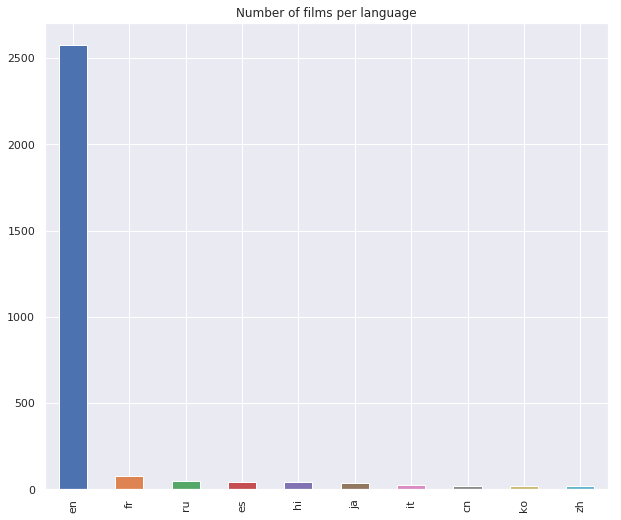

In [62]:
train_df.original_language.value_counts()[:10].plot.bar()
plt.title("Number of films per language")

#### English and Non-English movies

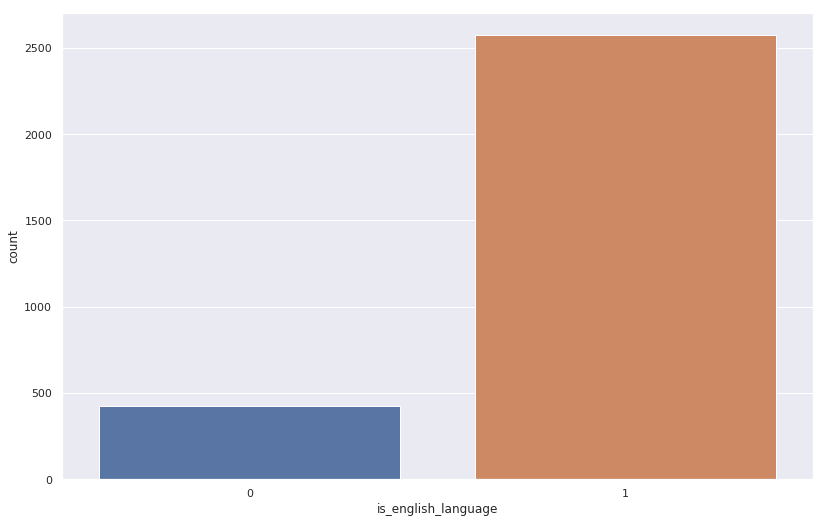

In [63]:

train_df["is_english_language"] = train_df.original_language.apply(lambda x: 1 if x == "en" else 0)
test_df["is_english_language"] = test_df.original_language.apply(lambda x: 1 if x == "en" else 0)

train_df.is_english_language = train_df.is_english_language.fillna(1)
test_df.is_english_language = test_df.is_english_language.fillna(1)

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(x="is_english_language", data=train_df)

#### Production Companies

Text(0.5, 1.0, 'Number of films per production company')

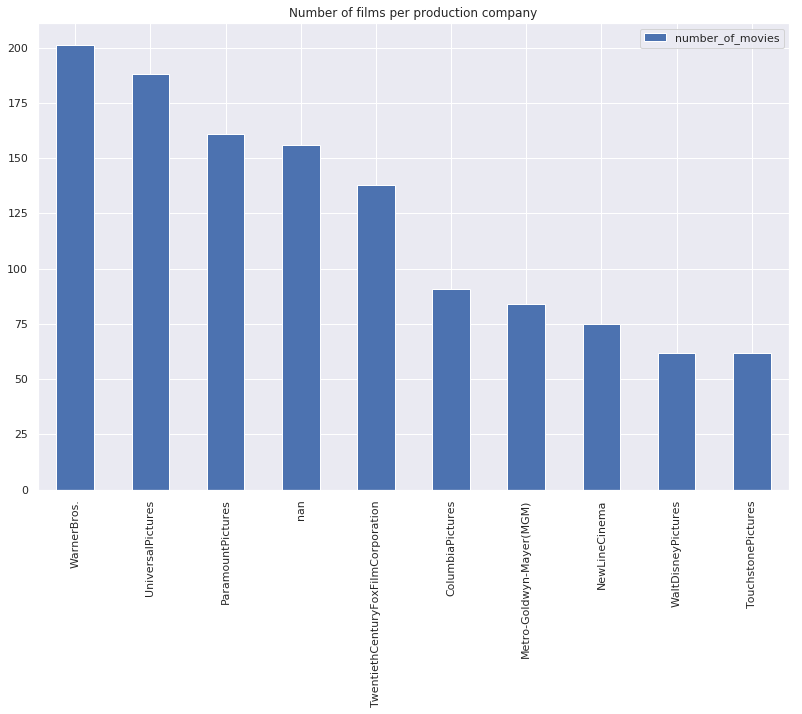

In [64]:
def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

train_df["production_companies_processed"] = train_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))
test_df["production_companies_processed"] = test_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))

production_companies_dict = dict()

for production_company in train_df["production_companies_processed"]:
    for elem in production_company:
        if elem not in production_companies_dict:
            production_companies_dict[elem] = 1
        else:
            production_companies_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(10).plot.bar()
plt.title("Number of films per production company")

#### Number of Production Companies

Text(0.5, 1.0, 'Number of multiple production companies per movie')

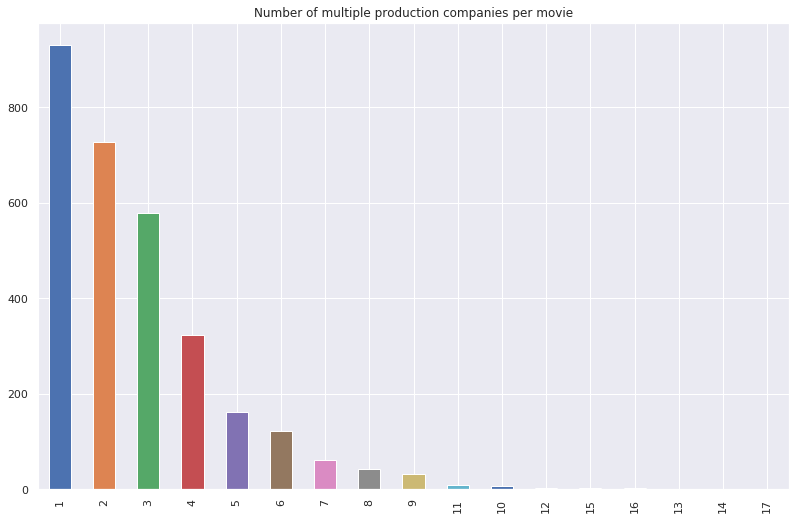

In [65]:
train_df["num_of_production_companies"] = train_df.production_companies_processed.apply(len)
test_df["num_of_production_companies"] = test_df.production_companies_processed.apply(len)

train_df["num_of_production_companies"].value_counts().plot.bar()
plt.title("Number of multiple production companies per movie")

#### isProductionCompany feature engineering

In [66]:
for g in production_companies_df.index.values:
    train_df['isProductionCompany_' + g] = train_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)
    test_df['isProductionCompany_' + g] = test_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)

#### production_countries

Text(0.5, 1.0, 'Number of films per production country')

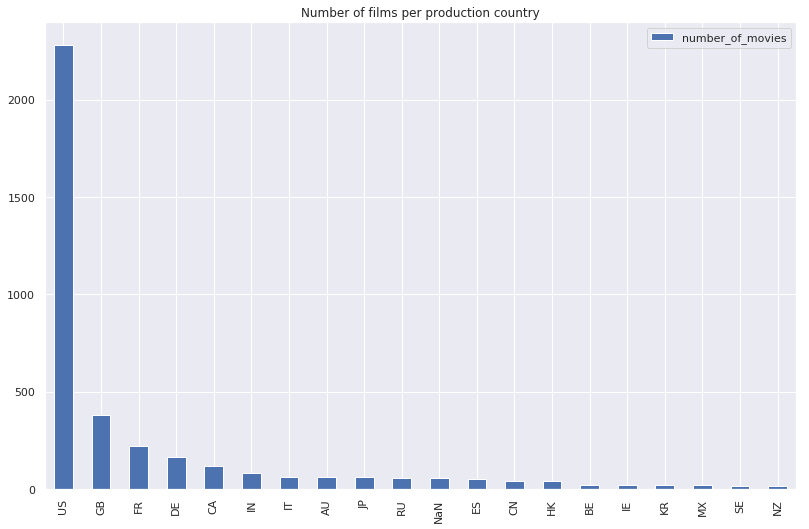

In [67]:
def production_countries_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

train_df["production_countries_processed"] = train_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))
test_df["production_countries_processed"] = test_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))


production_countries_dict = dict()

for production_country in train_df["production_countries_processed"]:
    for elem in production_country:
        if elem not in production_countries_dict:
            production_countries_dict[elem] = 1
        else:
            production_countries_dict[elem] += 1



production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
production_countries_df.columns = ["number_of_movies"]
production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
production_countries_df.head(20).plot.bar()
plt.title("Number of films per production country")

#### popularity

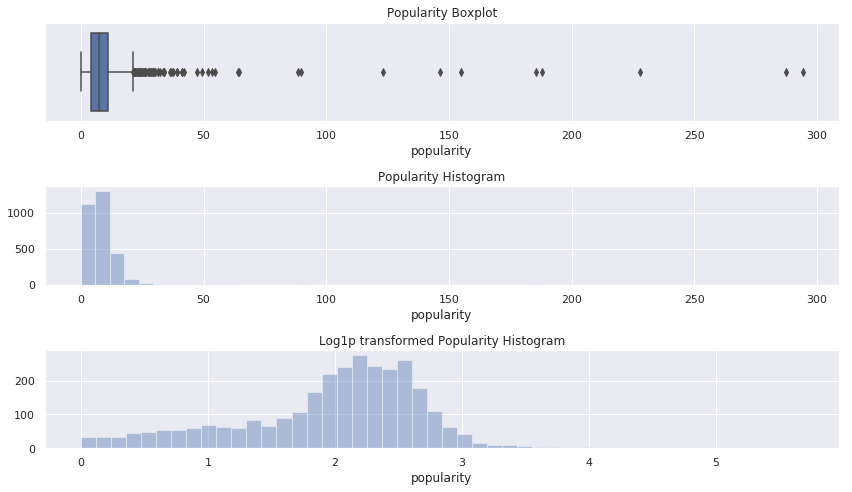

In [68]:
f, ax = plt.subplots(3, figsize=(12,7))
sns.boxplot(x=train_df.popularity, ax = ax[0])
ax[0].set_title("Popularity Boxplot")
sns.distplot(a=train_df.popularity, kde = False, ax = ax[1])
ax[1].set_title("Popularity Histogram")
sns.distplot(a=np.log1p(train_df.popularity), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed Popularity Histogram")
f.tight_layout()

train_df["log_popularity"] = np.log1p(train_df.popularity)
test_df["log_popularity"] = np.log1p(test_df.popularity)

#### Runtime

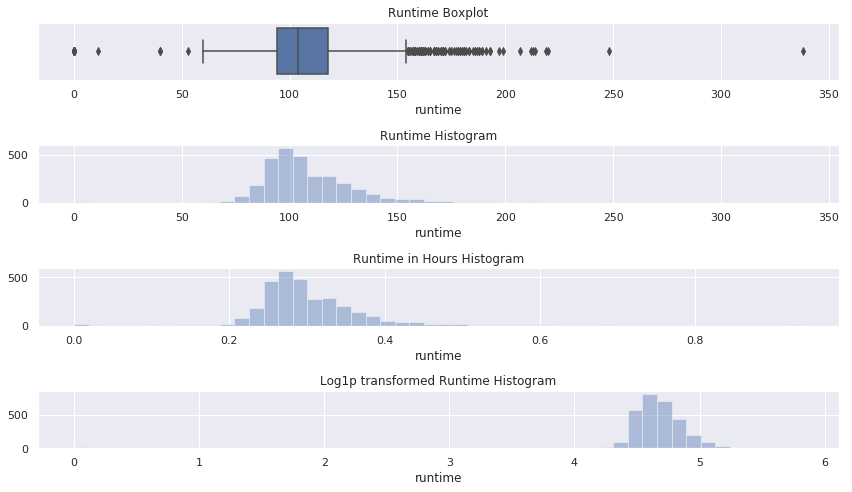

In [69]:
train_df["runtime"] = train_df["runtime"].fillna(train_df["runtime"].mode()[0])
test_df["runtime"] = test_df["runtime"].fillna(test_df["runtime"].mode()[0])

f, ax = plt.subplots(4, figsize=(12,7))

train_df.runtime = train_df.runtime.fillna(train_df.runtime.mode())

sns.boxplot(x=train_df.runtime, ax = ax[0])
ax[0].set_title("Runtime Boxplot")
sns.distplot(a=train_df.runtime, kde = False, ax = ax[1])
ax[1].set_title("Runtime Histogram")
sns.distplot(a=train_df.runtime/360, kde = False, ax = ax[2])
ax[2].set_title("Runtime in Hours Histogram")
sns.distplot(a=np.log1p(train_df.runtime), kde = False, ax = ax[3])
ax[3].set_title("Log1p transformed Runtime Histogram")
f.tight_layout()

train_df["runtime_in_hours"] = train_df.runtime/360
test_df["runtime_in_hours"] = test_df.runtime/360

train_df["log_runtime"] = np.log1p(train_df.runtime)
test_df["log_runtime"] = np.log1p(test_df.runtime)

#### Release Date preprocessing before EDA and ML

In [70]:
from datetime import datetime

# fill possible NA values with the statistical mode
train_df["release_date"] = train_df["release_date"].fillna(train_df["release_date"].mode()[0])
test_df["release_date"] = test_df["release_date"].fillna(test_df["release_date"].mode()[0])


train_df['temp'] = train_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

train_df["month"] = train_df.temp.apply(lambda x: x.month)
train_df["year"] = train_df.temp.apply(lambda x: x.year)
train_df["day_of_week"] = train_df.temp.apply(lambda x: x.weekday()+1)

train_df = train_df.drop(['temp'], axis=1)


test_df['temp'] = test_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

test_df["month"] = test_df.temp.apply(lambda x: x.month)
test_df["year"] = test_df.temp.apply(lambda x: x.year)
test_df["day_of_week"] = test_df.temp.apply(lambda x: x.weekday()+1)

test_df = test_df.drop(['temp'], axis=1)



train_df["day_of_week"] = train_df["day_of_week"].fillna(train_df["day_of_week"].mode()[0])
test_df["day_of_week"] = test_df["day_of_week"].fillna(test_df["day_of_week"].mode()[0])

train_df["year"] = train_df["year"].fillna(train_df["year"].mode()[0])
test_df["year"] = test_df["year"].fillna(test_df["year"].mode()[0])

train_df["month"] = train_df["month"].fillna(train_df["month"].mode()[0])
test_df["month"] = test_df["month"].fillna(test_df["month"].mode()[0])

train_df[["release_date", "month", "year", "day_of_week"]].head()

,release_date,month,year,day_of_week
0,2/20/15,2,2015,5
1,8/6/04,8,2004,5
2,10/10/14,10,2014,5
3,3/9/12,3,2012,5
4,2/5/09,2,2009,4


#### Month of Release, which month has most of the releases

Text(0.5, 1.0, 'Number of films per month')

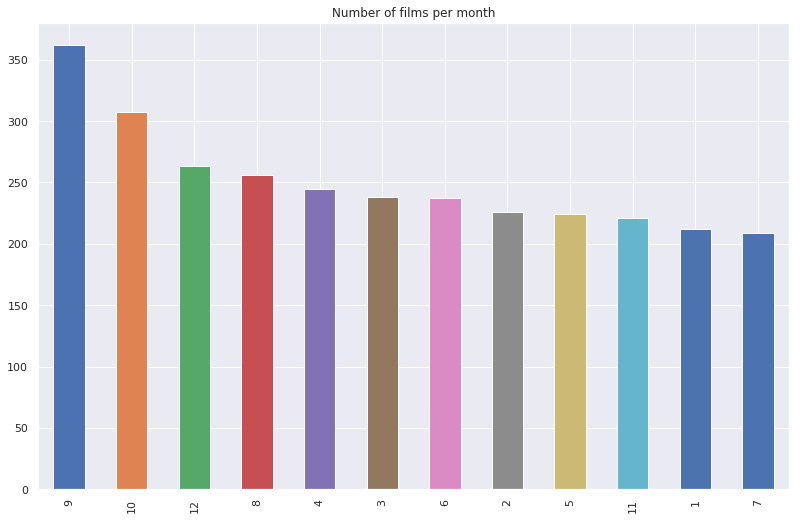

In [71]:
sns.set(rc={'figure.figsize':(12,8)})
train_df.month.value_counts().plot.bar()
plt.title('Number of films per month')

#### Day of Release, which day of the week has most of the releases

Text(0.5, 1.0, 'Number of films per day_of_week')

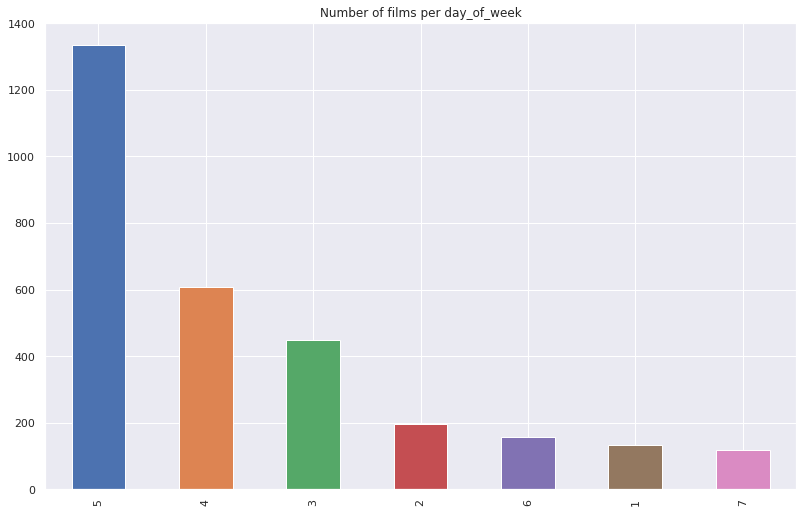

In [72]:
sns.set(rc={'figure.figsize':(12,8)})
train_df.day_of_week.value_counts().plot.bar()
plt.title('Number of films per day_of_week')

#### Year of Release, which year has most of the releases

Text(0.5, 1.0, 'Number of films per year')

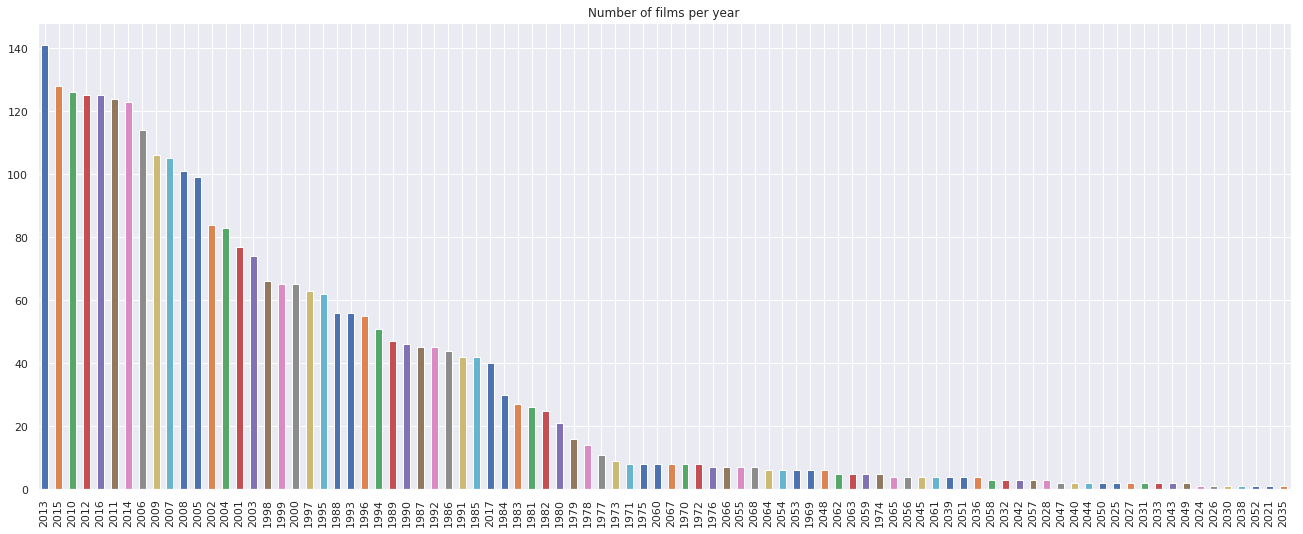

In [73]:
sns.set(rc={'figure.figsize':(20,8)})
train_df.year.value_counts().plot.bar()
plt.title('Number of films per year')

#### Cast

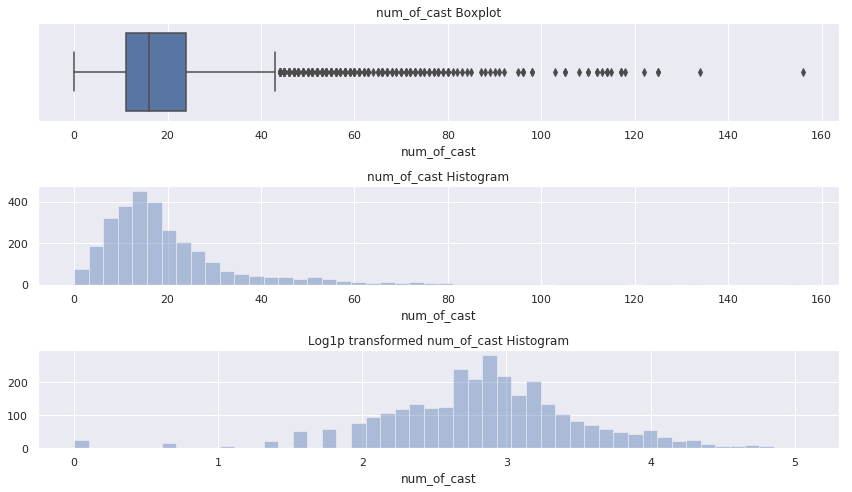

In [74]:
#import json
train_df["num_of_cast"] = train_df["cast"].str.count("name")
test_df["num_of_cast"] = test_df["cast"].str.count("name")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_cast = train_df.num_of_cast.fillna(0)
test_df.num_of_cast = test_df.num_of_cast.fillna(0)

sns.boxplot(x=train_df.num_of_cast, ax = ax[0])
ax[0].set_title("num_of_cast Boxplot")
sns.distplot(a=train_df.num_of_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_cast Histogram")
sns.distplot(a=np.log1p(train_df.num_of_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_cast Histogram")
f.tight_layout()


train_df["log_num_of_cast"] = np.log1p(train_df.num_of_cast)
test_df["log_num_of_cast"] = np.log1p(test_df.num_of_cast)

#### Production Countries

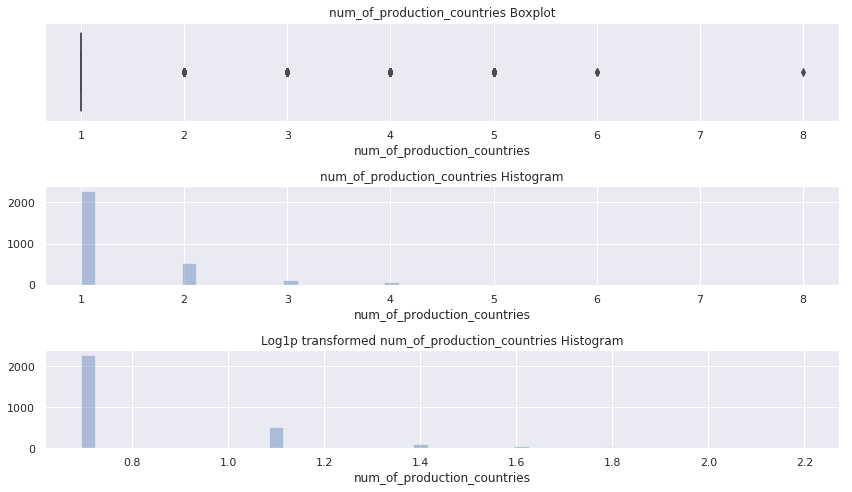

In [75]:
train_df["num_of_production_countries"] = train_df.production_countries_processed.apply(len)
test_df["num_of_production_countries"] = test_df.production_countries_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_production_countries = train_df.num_of_production_countries.fillna(0)
test_df.num_of_production_countries = test_df.num_of_production_countries.fillna(0)

sns.boxplot(x=train_df.num_of_production_countries, ax = ax[0])
ax[0].set_title("num_of_production_countries Boxplot")
sns.distplot(a=train_df.num_of_production_countries, kde = False, ax = ax[1])
ax[1].set_title("num_of_production_countries Histogram")
sns.distplot(a=np.log1p(train_df.num_of_production_countries), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_production_countries Histogram")
f.tight_layout()


train_df["log_num_of_production_countries"] = np.log1p(train_df.num_of_production_countries)
test_df["log_num_of_production_countries"] = np.log1p(test_df.num_of_production_countries)

#### Number of Genres in a movie

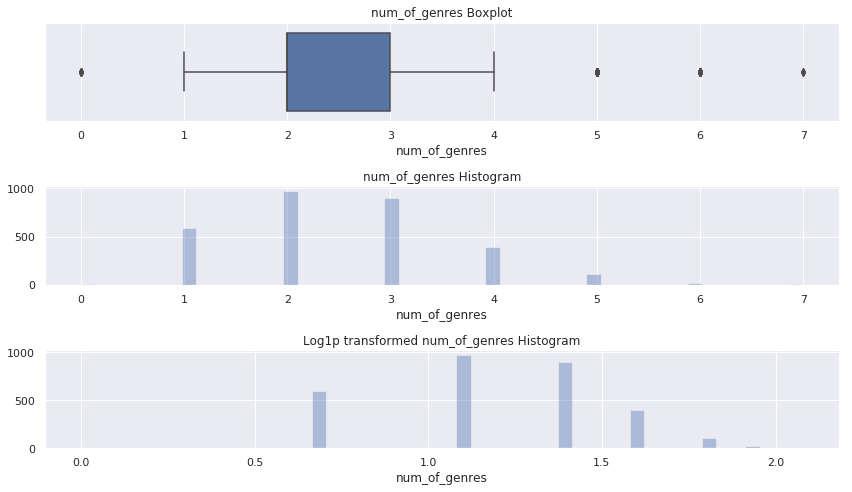

In [76]:
train_df["num_of_genres"] = train_df.genres_processed.apply(len)
test_df["num_of_genres"] = test_df.genres_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_genres = train_df.num_of_genres.fillna(0)
test_df.num_of_genres = test_df.num_of_genres.fillna(0)

sns.boxplot(x=train_df.num_of_genres, ax = ax[0])
ax[0].set_title("num_of_genres Boxplot")
sns.distplot(a=train_df.num_of_genres, kde = False, ax = ax[1])
ax[1].set_title("num_of_genres Histogram")
sns.distplot(a=np.log1p(train_df.num_of_genres), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_genres Histogram")
f.tight_layout()


train_df["log_num_of_genres"] = np.log1p(train_df.num_of_genres)
test_df["log_num_of_genres"] = np.log1p(test_df.num_of_genres)

### EDA - Bivariate Analysis

#### Bivariate Analysis for numerical features

Text(0.5, 1.0, 'Correlation between numerical features')

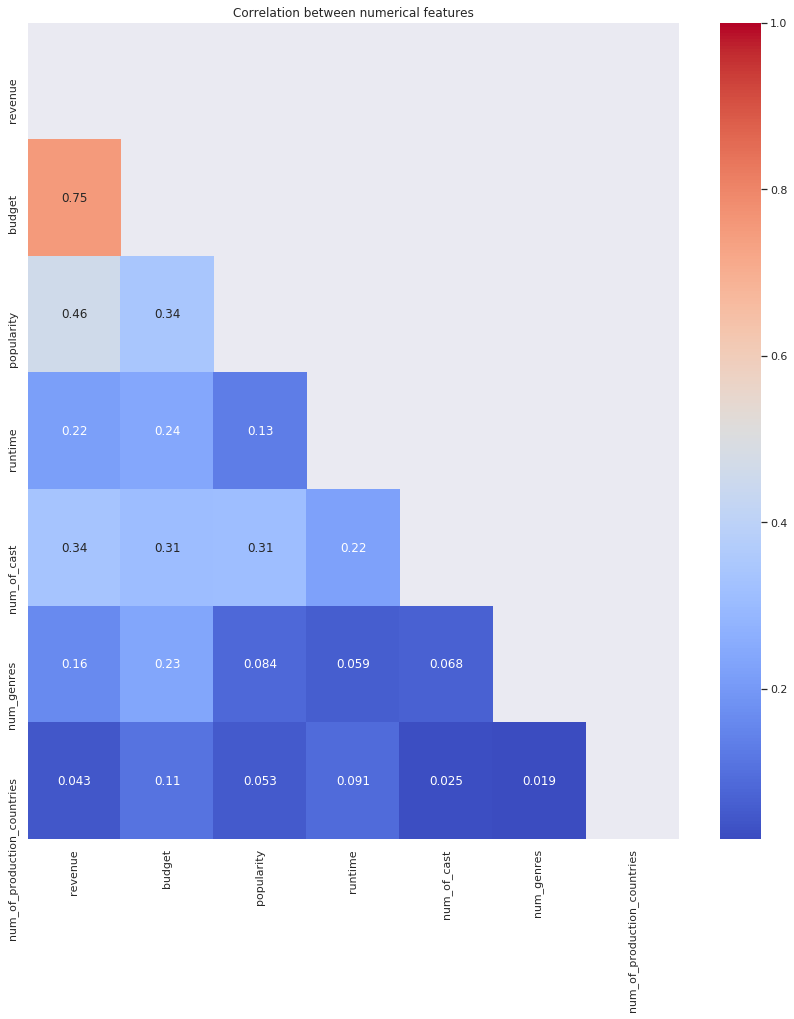

In [77]:
sns.set(rc={'figure.figsize':(13,14)})

# Compute the correlation matrix
corr = train_df[["revenue", "budget", "popularity", "runtime", "num_of_cast", "num_genres", "num_of_production_countries"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

#### Bivariate Analysis for log-transformed numerical features

Text(0.5, 1.0, 'Correlation between log1p transformed numerical features')

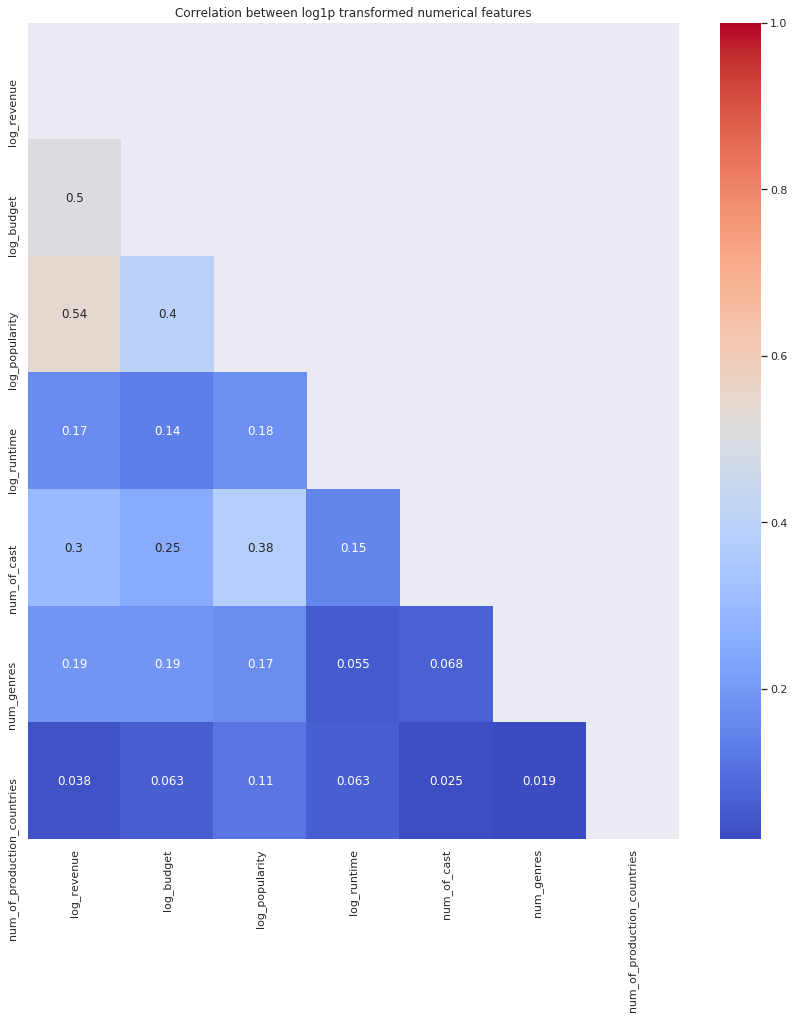

In [78]:
sns.set(rc={'figure.figsize':(13,14)})

# Compute the correlation matrix
corr = train_df[["log_revenue", "log_budget", "log_popularity", "log_runtime", "num_of_cast", "num_genres", "num_of_production_countries"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between log1p transformed numerical features")

### Bivariate Analysis and Feature Engineering

#### has_collection and revenue

0    2396
1     604
Name: has_collection, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without being in a collection')

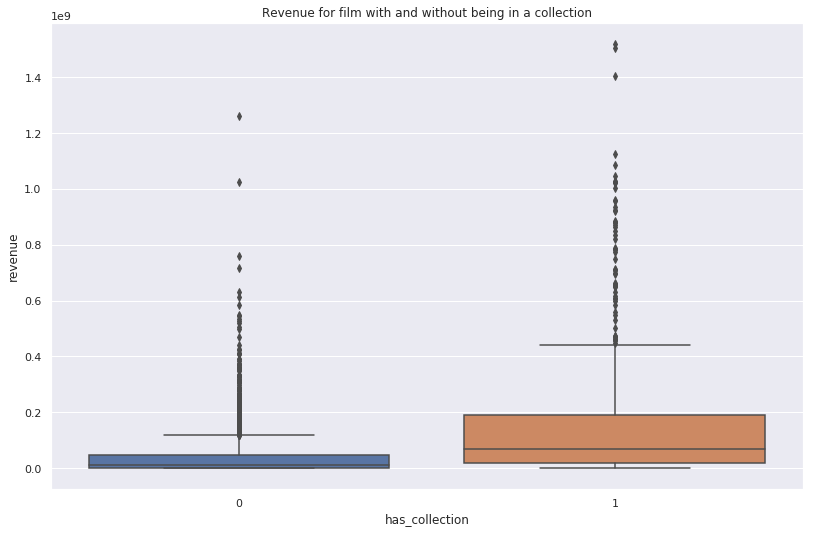

In [79]:
train_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in train_df['belongs_to_collection']]
test_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in test_df['belongs_to_collection']]
print(train_df['has_collection'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_collection', y='revenue', data=train_df)
plt.title('Revenue for film with and without being in a collection')

#### homepage and revenue

0    2054
1     946
Name: has_homepage, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without homepage')

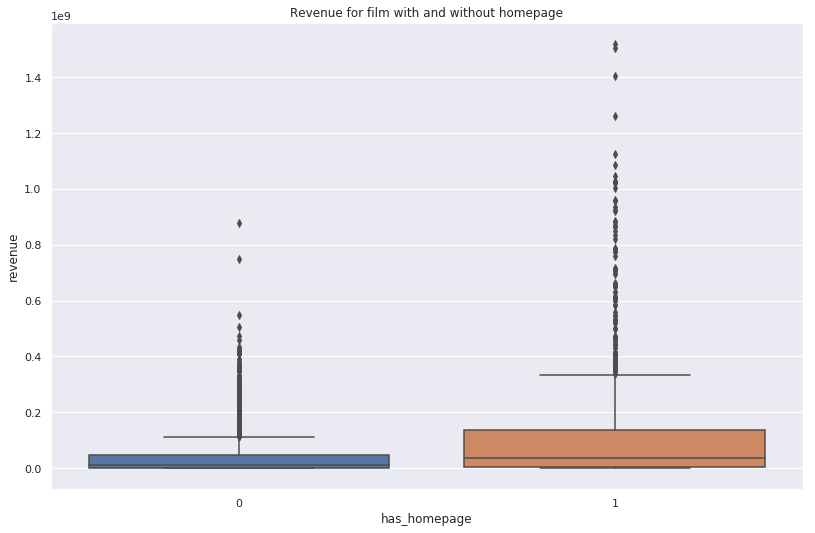

In [80]:
train_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in train_df['homepage']]
test_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in test_df['homepage']]
print(train_df['has_homepage'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_homepage', y='revenue', data=train_df)
plt.title('Revenue for film with and without homepage')

#### tagline and revenue

1    2403
0     597
Name: has_tag, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without tagline')

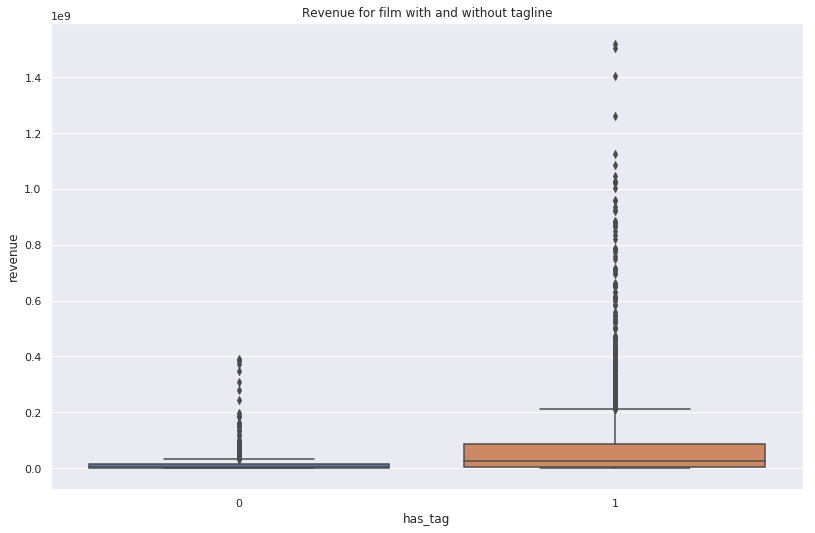

In [81]:
train_df['has_tag'] = [0 if pd.isnull(x) else 1 for x in train_df['tagline']]
test_df['has_tag'] = [0 if pd.isnull(x) else 1 for x in test_df['tagline']]
print(train_df['has_tag'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_tag', y='revenue', data=train_df)
plt.title('Revenue for film with and without tagline')

#### Number of Genres per movie and revenues

Text(0.5, 1.0, 'Revenues for films with multiple genres')

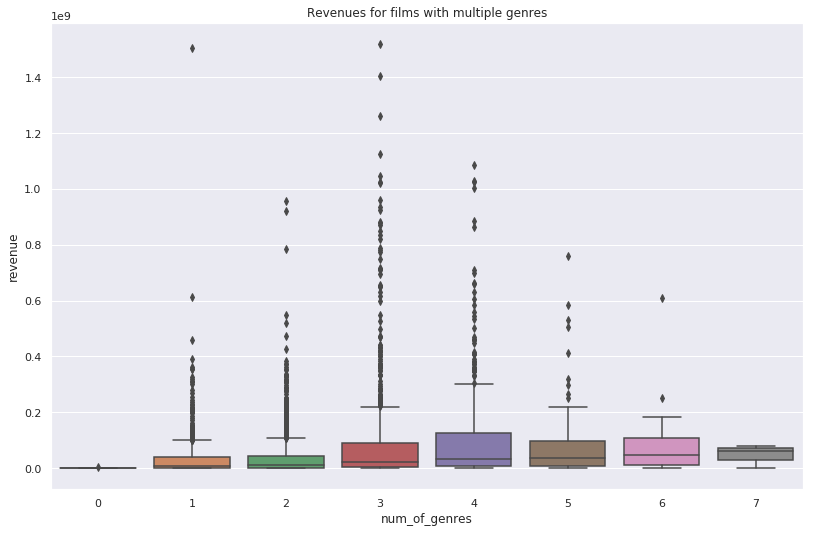

In [82]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_genres', y='revenue', data=train_df)
plt.title('Revenues for films with multiple genres')

#### original_language and revenue

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

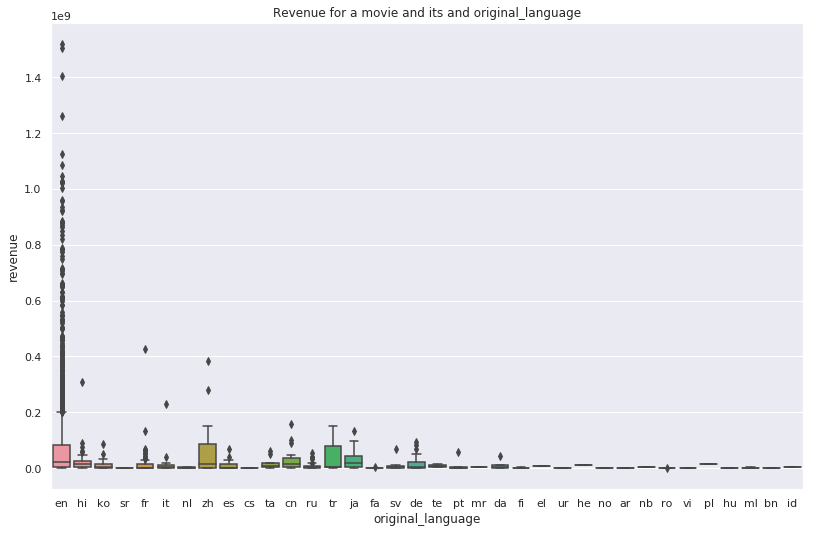

In [83]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='original_language', y='revenue', data=train_df)
plt.title('Revenue for a movie and its and original_language')

#### English and non english movies vs revenue

Text(0.5, 1.0, 'Revenue for a movie in contrast with english and non-english language')

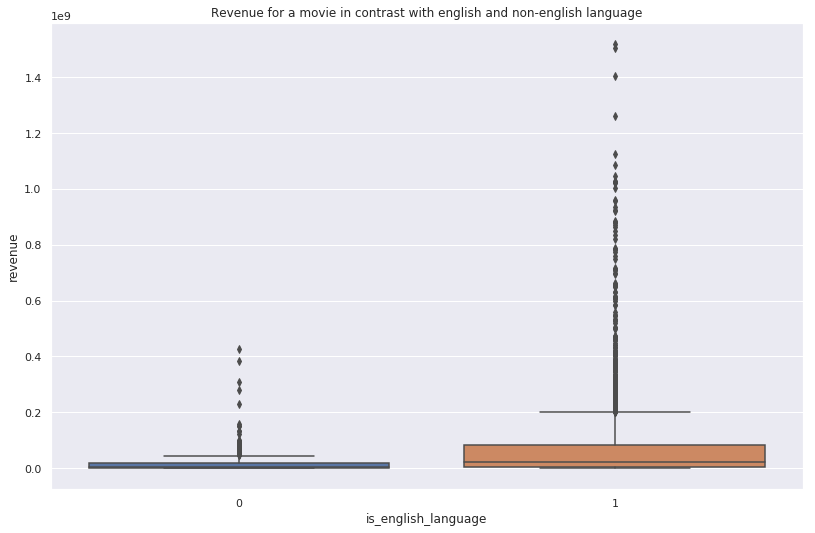

In [84]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='is_english_language', y='revenue', data=train_df)
plt.title('Revenue for a movie in contrast with english and non-english language')

#### production country and revenue

Text(0.5, 1.0, 'number of production countries for a movie and revenue')

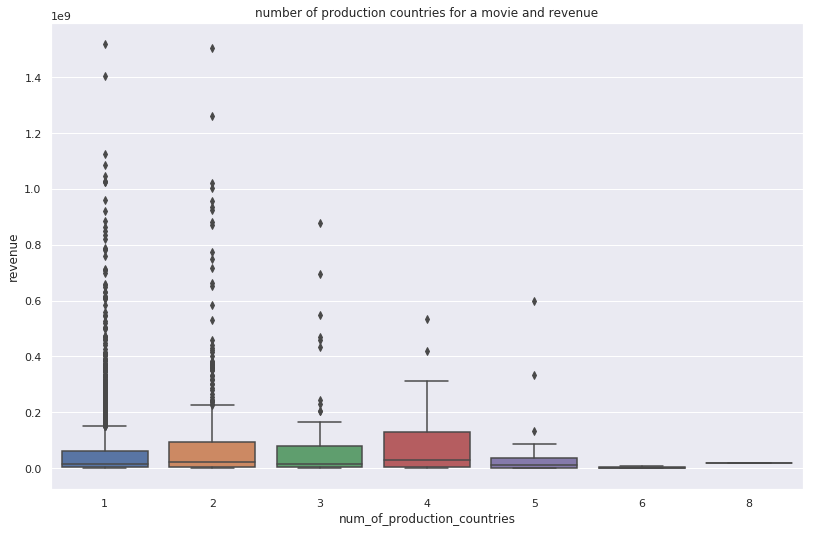

In [85]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_countries', y='revenue', data=train_df)
plt.title('number of production countries for a movie and revenue')

#### Day of the week when the movie released and revenue

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

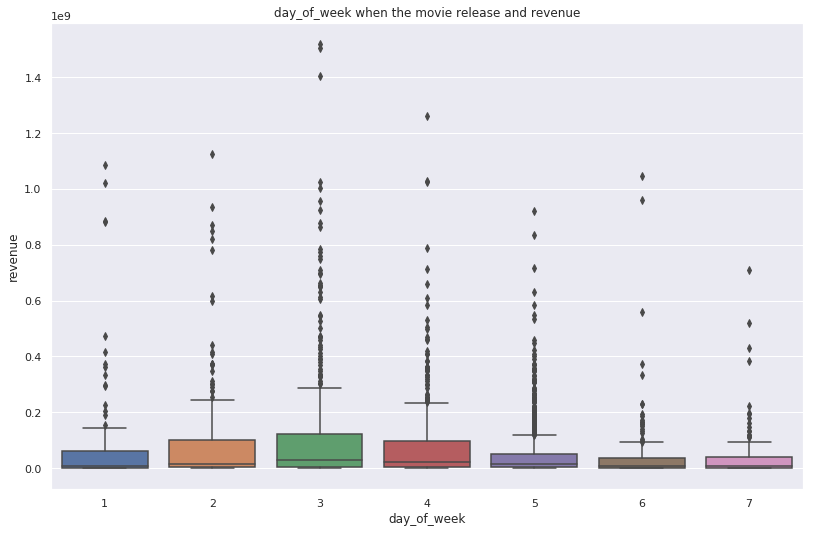

In [86]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='day_of_week', y='revenue', data=train_df)
plt.title('day_of_week when the movie release and revenue')

#### Month when the movie released and revenue

Text(0.5, 1.0, 'month when the movie release and revenue')

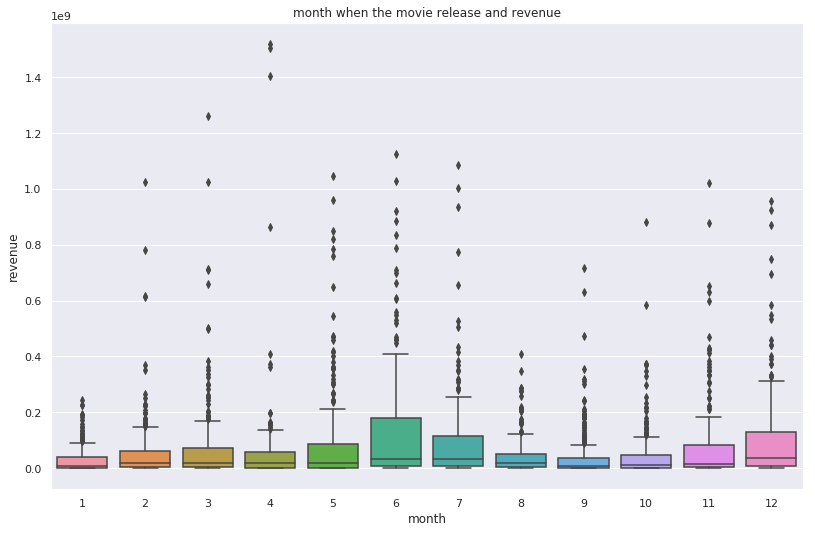

In [87]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='month', y='revenue', data=train_df)
plt.title('month when the movie release and revenue')

#### Year when the movie released and revenue

Text(0.5, 1.0, 'Year when the movie release and revenue')

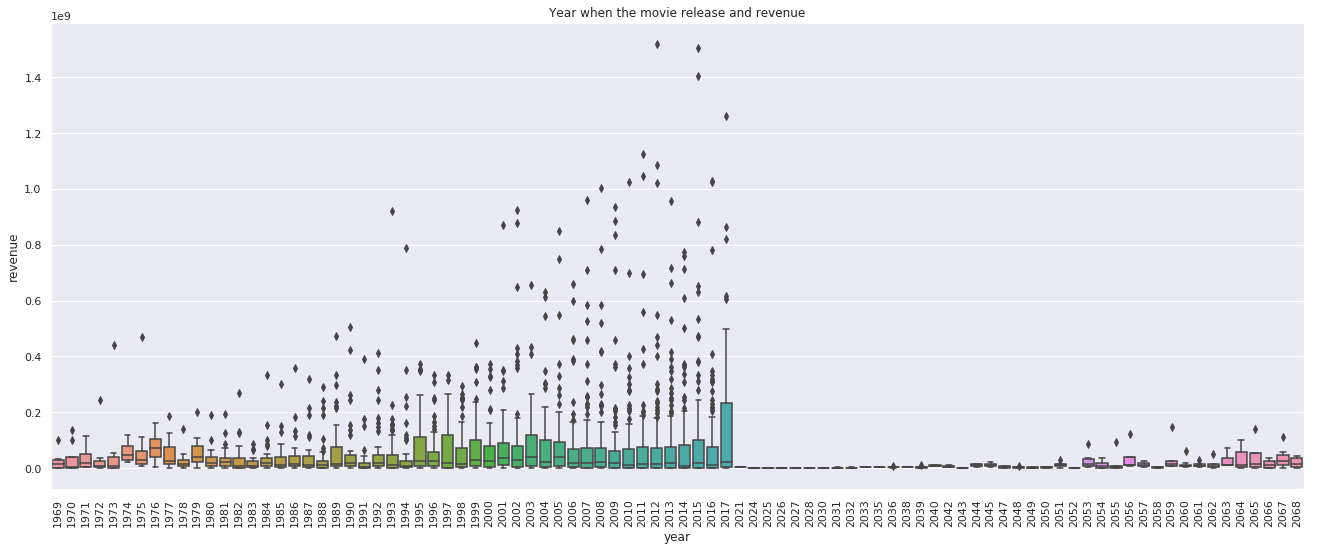

In [88]:
sns.set(rc={'figure.figsize':(20, 8)})
g = sns.boxplot(x='year', y='revenue', data=train_df)
plt.xticks(rotation=90)
plt.title('Year when the movie release and revenue')

#### Bivariate Analysis between each genre and revenue

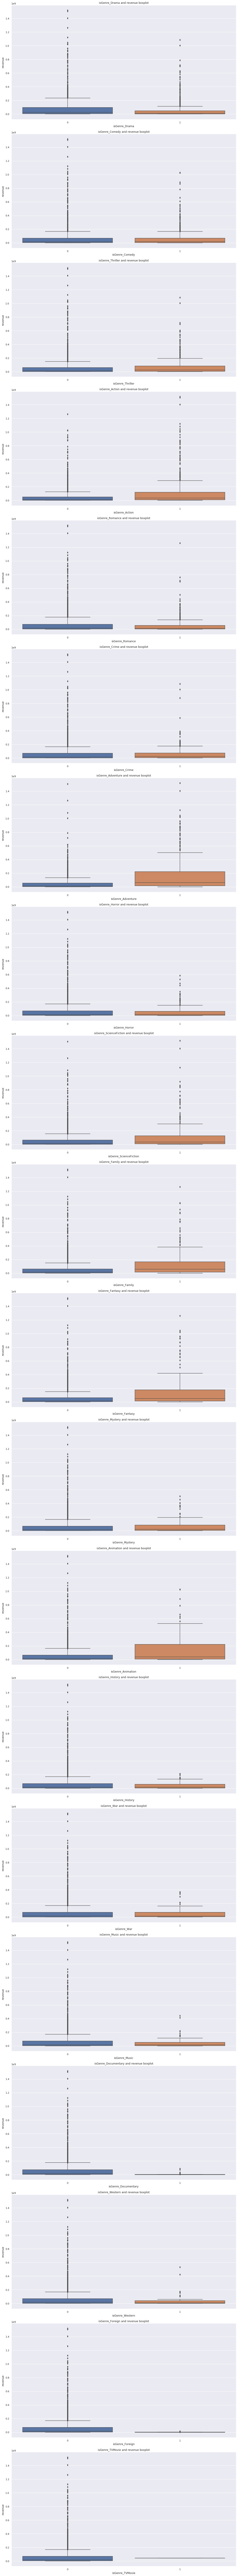

In [89]:
f, ax = plt.subplots(len(genres_df.index.values), 1, figsize=(15,160))

for i, g in enumerate(genres_df.index.values):
    sns.boxplot(x=train_df['isGenre_' + g], y='revenue', ax=ax[i], data=train_df)
    ax[i].set_title('isGenre_' + g +" and revenue boxplot")
f.tight_layout()

#### Number of Production Companies and revenue

Text(0.5, 1.0, 'number of production companies for a movie and revenue')

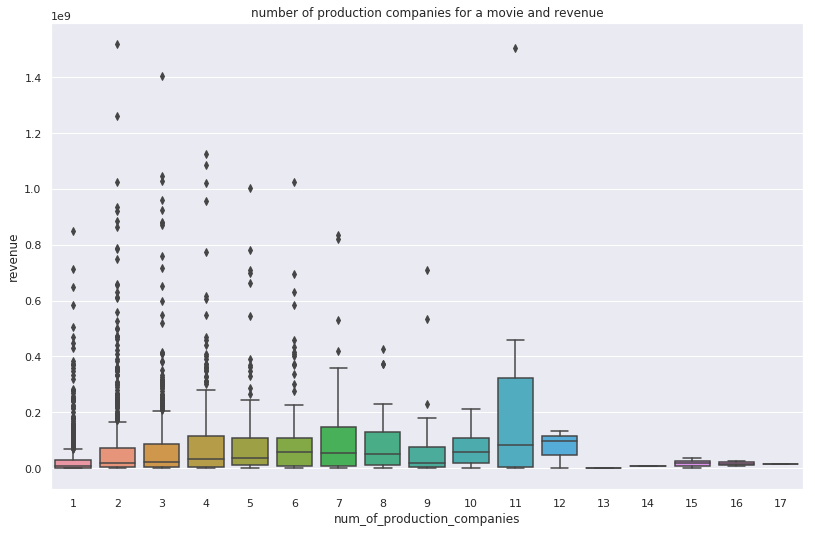

In [90]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_companies', y='revenue', data=train_df)
plt.title('number of production companies for a movie and revenue')

## Machine Learning

![](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)
[image-source](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)

#### Preparations before ML modeling

In [91]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity',
       ...
       'day_of_week', 'num_of_cast', 'log_num_of_cast',
       'num_of_production_countries', 'log_num_of_production_countries',
       'num_of_genres', 'log_num_of_genres', 'has_collection', 'has_homepage',
       'has_tag'],
      dtype='object', length=3787)

In [92]:
columns_for_training = ["log_budget", "log_popularity", "runtime", "day_of_week", "year", "month", 
                        "num_genres", "num_of_production_countries", "num_of_cast", "has_collection", 
                        "has_homepage", "has_tag", "is_english_language", 'isGenre_Action',
       'isGenre_Romance', 'isGenre_Crime', 'isGenre_Adventure',
       'isGenre_Horror', 'isGenre_ScienceFiction', 'isGenre_Family',
       'isGenre_Fantasy', 'isGenre_Mystery', 'isGenre_Animation',
       'isGenre_History', 'isGenre_War', 'isGenre_Music',
       'isGenre_Documentary', 'isGenre_Western', 'isGenre_Foreign',
       'isGenre_TVMovie']

# I will not add the isProductionCompany_ features, they worsen the LB Test Set results. 
#columns_for_training.extend(train_df.select(lambda col: col.startswith('isProductionCompany_'), axis=1).columns.values)

columns_for_training

['log_budget',
 'log_popularity',
 'runtime',
 'day_of_week',
 'year',
 'month',
 'num_genres',
 'num_of_production_countries',
 'num_of_cast',
 'has_collection',
 'has_homepage',
 'has_tag',
 'is_english_language',
 'isGenre_Action',
 'isGenre_Romance',
 'isGenre_Crime',
 'isGenre_Adventure',
 'isGenre_Horror',
 'isGenre_ScienceFiction',
 'isGenre_Family',
 'isGenre_Fantasy',
 'isGenre_Mystery',
 'isGenre_Animation',
 'isGenre_History',
 'isGenre_War',
 'isGenre_Music',
 'isGenre_Documentary',
 'isGenre_Western',
 'isGenre_Foreign',
 'isGenre_TVMovie']

In [93]:
train_df[columns_for_training].head(4)

,log_budget,log_popularity,runtime,day_of_week,year,month,num_genres,num_of_production_countries,num_of_cast,has_collection,has_homepage,has_tag,is_english_language,isGenre_Action,isGenre_Romance,isGenre_Crime,isGenre_Adventure,isGenre_Horror,isGenre_ScienceFiction,isGenre_Family,isGenre_Fantasy,isGenre_Mystery,isGenre_Animation,isGenre_History,isGenre_War,isGenre_Music,isGenre_Documentary,isGenre_Western,isGenre_Foreign,isGenre_TVMovie
0,16.454568,2.024905,93.0,5,2015,2,1,1,24.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17.504390,2.224504,113.0,5,2004,8,4,1,20.0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,15.009433,4.178992,105.0,5,2014,10,1,1,51.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.997833,1.429099,122.0,5,2012,3,2,1,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
# a small code for t-test significance between 2 groups, I may use it in the future:


#from scipy import stats

#columns_to_test = train_df.select(lambda col: col.startswith('isProductionCompany_'), axis=1).columns.values

#def check_catagorical_to_revenue_statistical_difference(train_df):
    
#    for col in columns_to_test:

#        a = train_df[train_df[col]==0].revenue
#        b = train_df[train_df[col]==1].revenue
#        t2, p2 = stats.ttest_ind(a,b)
#        if p2<0.05:
#            print(col , " is important for prediction with p-value:", p2)
        
#check_catagorical_to_revenue_statistical_difference(train_df)
    

In [95]:
#columns_for_training.remove("original_language")

In [96]:
y = train_df['log_revenue']
X = train_df[columns_for_training]

### Baseline XGBoost modeling


Fold: 0

[0]	validation_0-rmse:14.1948	validation_1-rmse:14.1305
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.81954	validation_1-rmse:1.97421
[200]	validation_0-rmse:1.63159	validation_1-rmse:1.9682
[300]	validation_0-rmse:1.4656	validation_1-rmse:1.96942
[400]	validation_0-rmse:1.3472	validation_1-rmse:1.98369
[500]	validation_0-rmse:1.25817	validation_1-rmse:1.98161
[600]	validation_0-rmse:1.1734	validation_1-rmse:1.98994
[700]	validation_0-rmse:1.09707	validation_1-rmse:2.00084
[800]	validation_0-rmse:1.02188	validation_1-rmse:2.00902
[900]	validation_0-rmse:0.958937	validation_1-rmse:2.0176
[1000]	validation_0-rmse:0.896234	validation_1-rmse:2.03026
[1100]	validation_0-rmse:0.843083	validation_1-rmse:2.03904
[1200]	validation_0-rmse:0.79548	validation_1-rmse:2.0489
Stopping. Best iteration:
[241]	validation_0-rmse:1.56012	validation_1-rmse:1

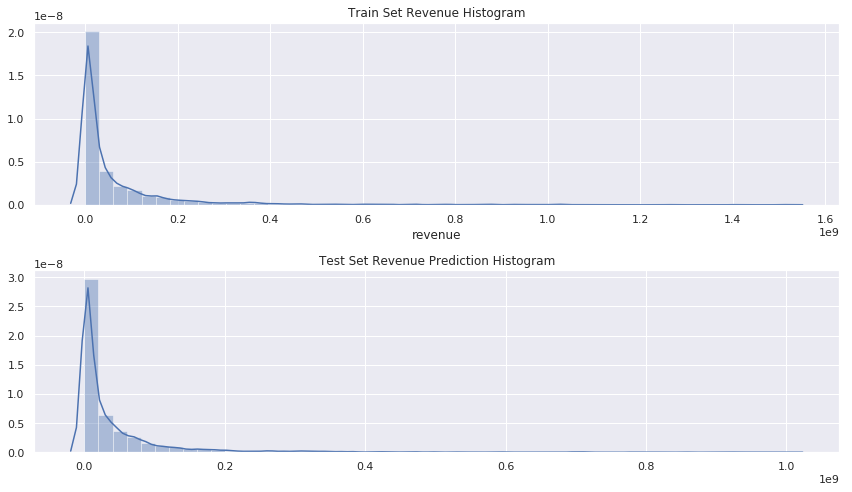

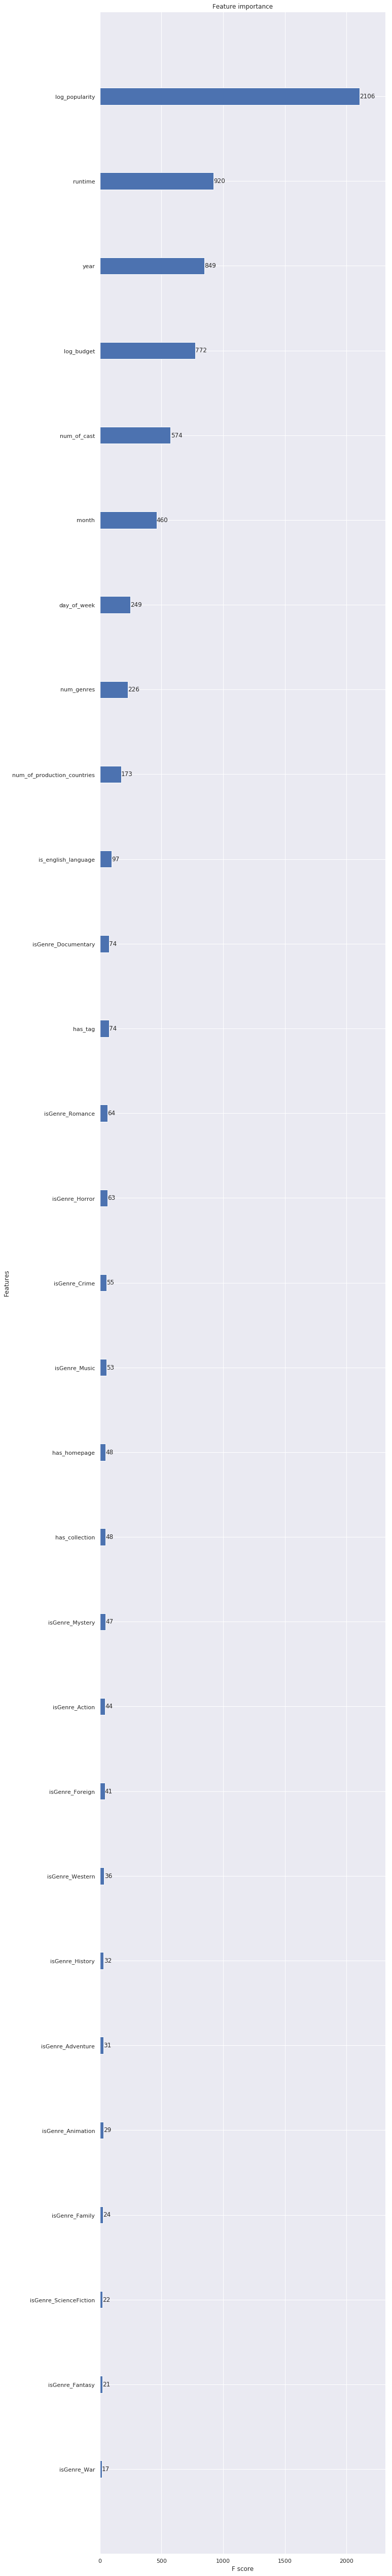

In [97]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
import time
import random

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)


predictions_test_xgb = np.zeros(len(test_df))
num_fold = 0
num_of_splits = 5
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_xgb = xgb.XGBRegressor(n_estimators=10000, seed=42, nthread=-1)

    clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    oof_rmse += rmse_valid

    predictions_test_xgb += clf_stra_xgb.predict(test_df[xtrain.columns])/num_of_splits


predictions_test_xgb = np.expm1(predictions_test_xgb)
print(predictions_test_xgb)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,86)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_xgb)

### Bayesian Tuning

In [98]:
def bayesian_tuning(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    import xgboost as xgb
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = xgb.XGBRegressor(
            nthread = -1,
            objective = 'reg:linear',
            verbosity=1,
            random_state=42
        ),
        search_spaces = {
            'learning_rate': (0.01, 1.0),
            'min_child_weight': (0, 10),
            'n_estimators': (50, 100),
            'max_depth': (0, 12),
            'gamma': (1e-2, 10),
            'subsample': (0.01, 1.0),
            'colsample_bytree': (0.01, 1.0),
            'colsample_bylevel': (0.01, 1.0),
            'scale_pos_weight': (0.01, 1.0),
            'reg_lambda': (1e-1, 10),
            'reg_alpha': (1e-2, 1.0),
            'max_delta_step': (0, 10),
            'scale_pos_weight': (1e-2, 1)
        },
        cv = KFold(
            n_splits=num_of_splits,
            shuffle=True,
            random_state=42
        ),
        n_jobs = 1,
        n_iter = 9,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: 0.3519
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 9.32935130848986, 'learning_rate': 0.32264159755217825, 'max_delta_step': 7, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 87, 'reg_alpha': 0.31141867792614114, 'reg_lambda': 6.513136724634089, 'scale_pos_weight': 0.5544643023916863, 'subsample': 0.13556548021189216}

Model #2
Best score: 0.4669
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 3.041066997742908, 'learning_rate': 0.9517116675273961, 'max_delta_step': 9, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.6393718108603786, 'reg_lambda': 9.539453486878958, 'scale_pos_weight': 0.6336020558163782, 'subsample': 0.9923710598637134}

Model #3
Best score: 0.4669
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 3.041066997742908, 'learning_rate': 0.951711667527

In [99]:
result.best_params_

{'colsample_bylevel': 0.7366877378057127,
 'colsample_bytree': 0.9399760402267441,
 'gamma': 1.644435714599117,
 'learning_rate': 0.19654103884777585,
 'max_delta_step': 8,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 77,
 'reg_alpha': 0.7874310977710708,
 'reg_lambda': 5.618529316013081,
 'scale_pos_weight': 0.5930070264428381,
 'subsample': 0.5689543694097536}

### XGBoost Training after tuning


Fold: 0

[0]	validation_0-rmse:12.785	validation_1-rmse:12.7094
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.48952	validation_1-rmse:1.94893
[200]	validation_0-rmse:1.11176	validation_1-rmse:2.00535
[300]	validation_0-rmse:0.877608	validation_1-rmse:2.057
[400]	validation_0-rmse:0.753417	validation_1-rmse:2.08471
[500]	validation_0-rmse:0.677759	validation_1-rmse:2.09215
[600]	validation_0-rmse:0.639318	validation_1-rmse:2.10231
[700]	validation_0-rmse:0.610901	validation_1-rmse:2.1135
[800]	validation_0-rmse:0.589168	validation_1-rmse:2.11673
[900]	validation_0-rmse:0.576571	validation_1-rmse:2.12506
[1000]	validation_0-rmse:0.565908	validation_1-rmse:2.124
[1100]	validation_0-rmse:0.55831	validation_1-rmse:2.12041
Stopping. Best iteration:
[122]	validation_0-rmse:1.39357	validation_1-rmse:1.9409


Fold: 1

[0]	validation_0-rmse:12.7544	validat

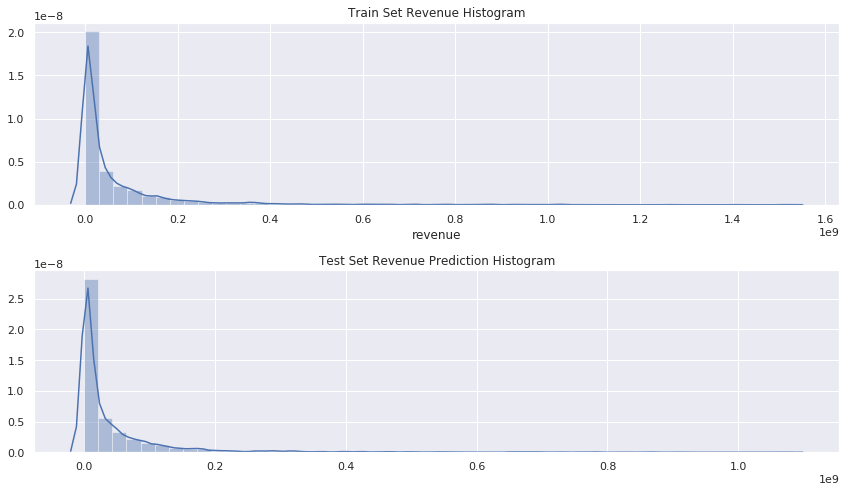

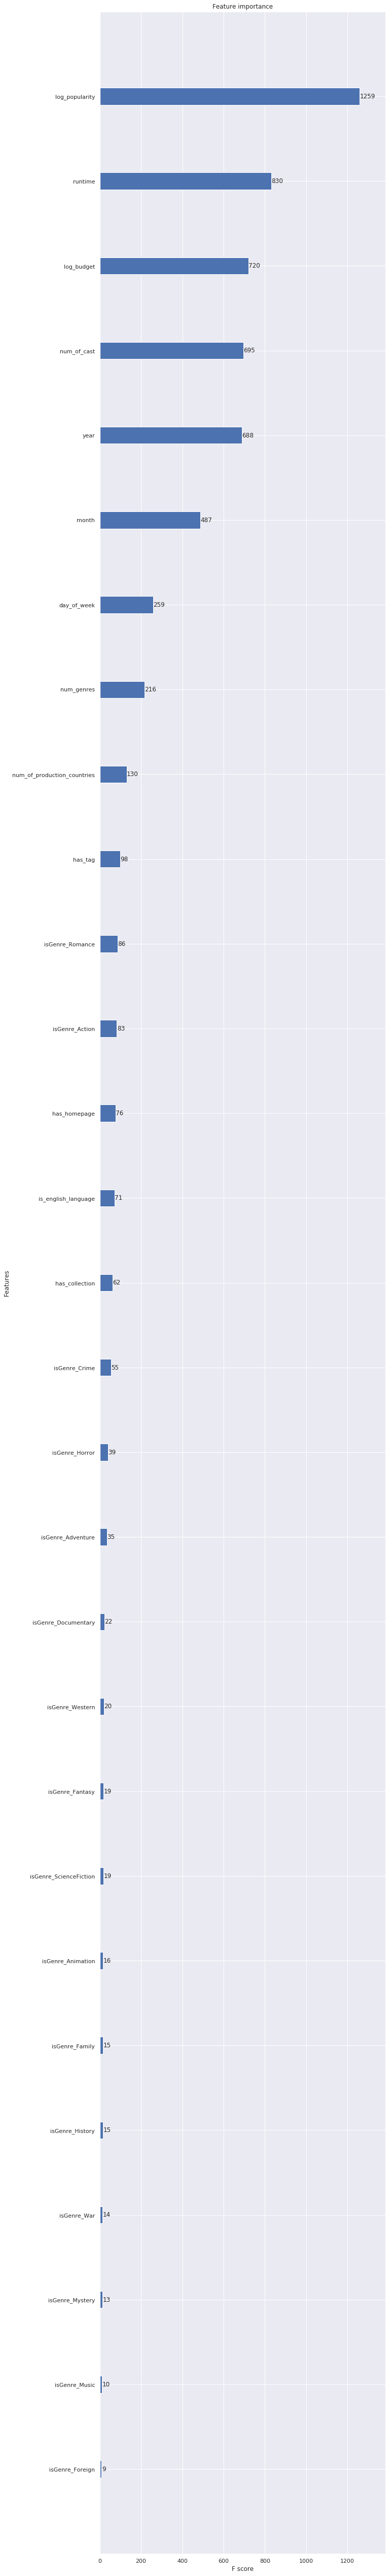

In [100]:
from sklearn.model_selection import train_test_split, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_test_xgb_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = 5

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    
    clf_stra_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                    gamma=result.best_params_["gamma"],                 
                                    learning_rate=result.best_params_["learning_rate"],
                                    max_depth=result.best_params_["max_depth"],
                                    min_child_weight=result.best_params_["min_child_weight"],
                                    n_estimators=10000,
                                    reg_alpha=result.best_params_["reg_alpha"],
                                    reg_lambda=result.best_params_["reg_lambda"],
                                    subsample=result.best_params_["subsample"],
                                    seed=42,
                                    nthread = -1)

    clf_stra_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_tuned_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    oof_rmse += rmse_valid

    predictions_test_xgb_tuned += clf_stra_tuned_xgb.predict(test_df[xtrain.columns])/num_of_splits
    
print()
predictions_test_xgb_tuned = np.expm1(predictions_test_xgb_tuned)
print(predictions_test_xgb_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,86)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_tuned_xgb)

### Extra Trees Baseline Modeling


Fold: 0

Fold xvalid rmse: 2.1220803214183874

Fold: 1

Fold xvalid rmse: 2.1226226605708867

Fold: 2

Fold xvalid rmse: 2.072071289184365

Fold: 3

Fold xvalid rmse: 2.0958389806028204

Fold: 4

Fold xvalid rmse: 2.158724692351212

[ 9342169.29895392  1404101.76774047  6615597.84273172 ...
 30835886.65580698  2911269.56680038   701508.03095018]

OOF Out-of-fold rmse: 2.1142675888255344


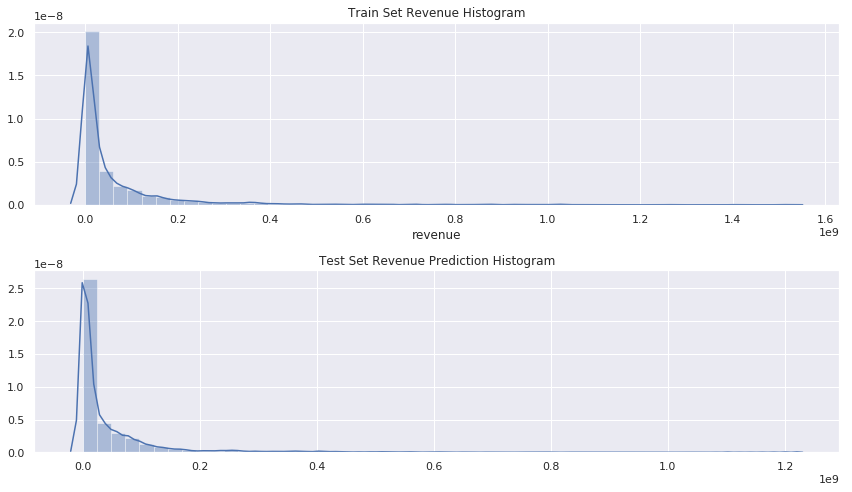

In [101]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_extra_trees_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = 5
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

    clf_extra_trees.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    oof_rmse += rmse_valid

    predictions_extra_trees_test += clf_extra_trees.predict(test_df[xtrain.columns])/num_of_splits


predictions_extra_trees_test = np.expm1(predictions_extra_trees_test)
print()
print(predictions_extra_trees_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_extra_trees_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Extra Trees Tuning

In [102]:
def bayesian_tuning_extra_trees(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    from sklearn.ensemble import ExtraTreesRegressor
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = ExtraTreesRegressor(
            random_state=42
        ),
        search_spaces = {
            'n_estimators': (10, 500),
            'max_depth': (1, 12),
            'min_samples_split': (2, 10),
            'min_samples_leaf': (1, 10)
        },
        cv = KFold(
            n_splits=num_of_splits,
            shuffle=True,
            random_state=42
        ),
        n_jobs = 2,
        n_iter = 8,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result_extra_trees = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_extra_trees
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_extra_trees = bayesian_tuning_extra_trees(xtrain, ytrain)

Model #1
Best score: 0.4845
Best params: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 9, 'n_estimators': 165}

Model #2
Best score: 0.4958
Best params: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 476}

Model #3
Best score: 0.4958
Best params: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 476}

Model #4
Best score: 0.5114
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 403}

Model #5
Best score: 0.5114
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 403}

Model #6
Best score: 0.5114
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 403}

Model #7
Best score: 0.5114
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 403}

Model #8
Best score: 0.5114
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7,

In [103]:
result_extra_trees.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 403}

### Extra Trees Training after tuning


Fold: 0

Fold xvalid rmse: 2.0635616672158013

Fold: 1

Fold xvalid rmse: 2.044146655074401

Fold: 2

Fold xvalid rmse: 2.0268801052095475

Fold: 3

Fold xvalid rmse: 2.0302074437098425

Fold: 4

Fold xvalid rmse: 2.066501045376735

[ 5894992.63919243  1409463.36038038  4689757.38511676 ...
 26089051.59180211  3355547.75292247  1590756.67355115]

OOF Out-of-fold rmse: 2.0462593833172655


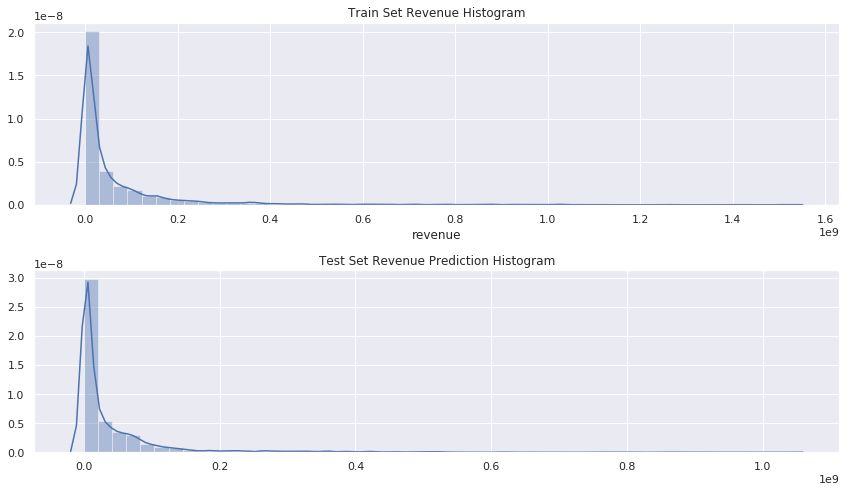

In [104]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_extra_trees_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = 5
oof_rmse = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_extra_trees_tuned = ExtraTreesRegressor(random_state=42, 
                                                max_depth = result_extra_trees.best_params_['max_depth'], 
                                                min_samples_leaf = result_extra_trees.best_params_['min_samples_leaf'], 
                                                min_samples_split = result_extra_trees.best_params_['min_samples_split'], 
                                                n_estimators = result_extra_trees.best_params_['n_estimators'])

    clf_extra_trees_tuned.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    oof_rmse += rmse_valid

    predictions_extra_trees_tuned_test += clf_extra_trees_tuned.predict(test_df[xtrain.columns])/num_of_splits


predictions_extra_trees_tuned_test = np.expm1(predictions_extra_trees_tuned_test)
print()
print(predictions_extra_trees_tuned_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_extra_trees_tuned_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Random Forest Baseline


Fold: 0

Fold xvalid rmse: 2.1001333575201038

Fold: 1

Fold xvalid rmse: 2.1016832662508875

Fold: 2

Fold xvalid rmse: 2.0408476353451612

Fold: 3

Fold xvalid rmse: 2.0649841534663143

Fold: 4

Fold xvalid rmse: 2.0750541969334666

[ 3491431.61407715   743514.91280417  6260900.10283194 ...
 28183864.22350961  4862923.2869878   1701554.7689399 ]

OOF Out-of-fold rmse: 2.0765405219031865


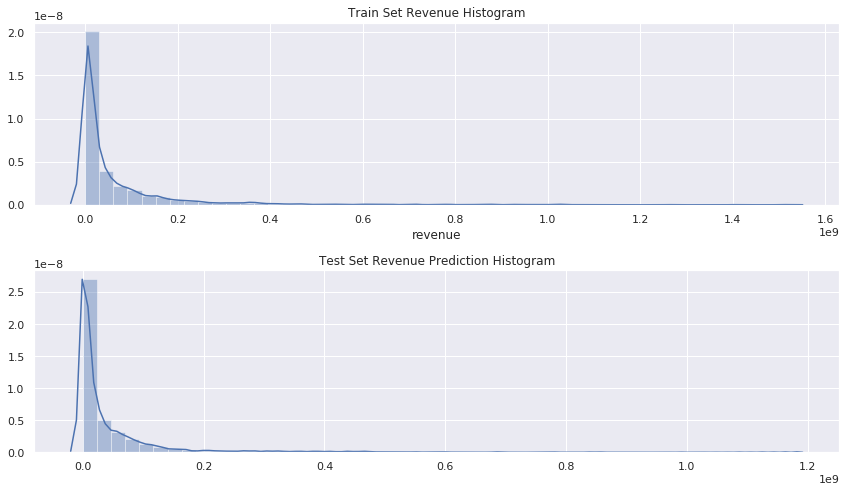

In [105]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_random_forest_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = 5
oof_rmse = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    clf_random_forest = RandomForestRegressor(random_state=42, n_estimators = 100)

    clf_random_forest.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_random_forest.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    oof_rmse += rmse_valid

    predictions_random_forest_test += clf_random_forest.predict(test_df[xtrain.columns])/num_of_splits


predictions_random_forest_test = np.expm1(predictions_random_forest_test)
print()
print(predictions_random_forest_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_random_forest_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Random Forest Tuning

In [106]:
def bayesian_tuning_random_forest(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    from sklearn.ensemble import RandomForestRegressor
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = RandomForestRegressor(
            random_state=42
        ),
        search_spaces = {
            'n_estimators': (10, 500),
            'max_depth': (1, 12),
            'min_samples_split': (2, 10),
            'min_samples_leaf': (1, 10)
        },
        cv = KFold(
            n_splits=num_of_splits,
            shuffle=True,
            random_state=42
        ),
        n_jobs = 2,
        n_iter = 9,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result_random_forest = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_random_forest
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_random_forest = bayesian_tuning_random_forest(xtrain, ytrain)

Model #1
Best score: 0.4905
Best params: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 9, 'n_estimators': 165}

Model #2
Best score: 0.4905
Best params: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 476}

Model #3
Best score: 0.4905
Best params: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 476}

Model #4
Best score: 0.4984
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 403}

Model #5
Best score: 0.4984
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 403}

Model #6
Best score: 0.4984
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 403}

Model #7
Best score: 0.4984
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 403}

Model #8
Best score: 0.4984
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7,

In [107]:
result_random_forest.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 403}

### Random Forest After tuning


Fold: 0

Fold xvalid rmse: 2.043948735454891

Fold: 1

Fold xvalid rmse: 2.035181386038357

Fold: 2

Fold xvalid rmse: 2.031310953954033

Fold: 3

Fold xvalid rmse: 2.019055761605266

Fold: 4

Fold xvalid rmse: 2.028041778751889

[ 3491431.61407715   743514.91280417  6260900.10283194 ...
 28183864.22350961  4862923.2869878   1701554.7689399 ]

OOF Out-of-fold rmse: 2.0315077231608876


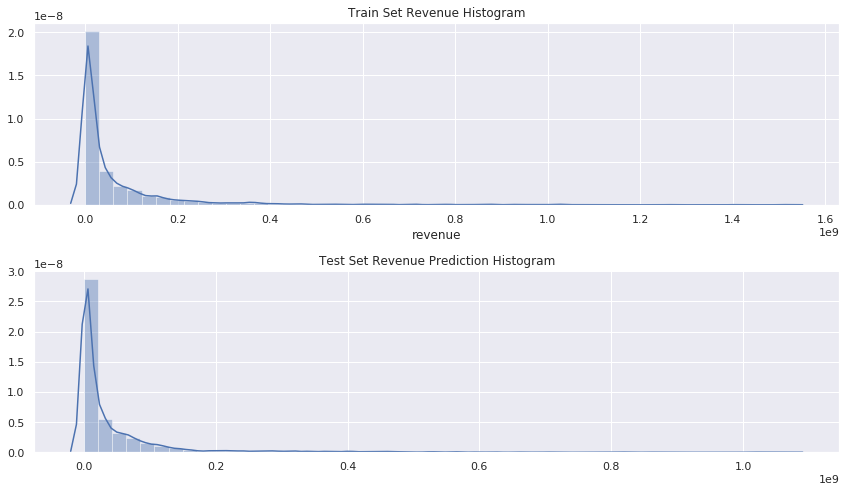

In [108]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_random_forest_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = 5
oof_rmse = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    clf_random_forest_tuned = RandomForestRegressor(random_state=42, 
                                              n_estimators = result_random_forest.best_params_['n_estimators'],
                                              min_samples_leaf = result_random_forest.best_params_['min_samples_leaf'],
                                              min_samples_split = result_random_forest.best_params_['min_samples_split'])

    clf_random_forest_tuned.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_random_forest_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    oof_rmse += rmse_valid

    predictions_random_forest_tuned_test += clf_random_forest_tuned.predict(test_df[xtrain.columns])/num_of_splits


predictions_random_forest_tuned_test = np.expm1(predictions_random_forest_tuned_test)
print()
print(predictions_random_forest_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_random_forest_tuned_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

## Feature Selection

### Feature Selection for xgboost

In [109]:
from sklearn.feature_selection import SelectFromModel

max_selected_features = 10
sel = SelectFromModel(clf_stra_xgb, max_features = max_selected_features, threshold=0.005, prefit=True)

feature_idx = sel.get_support()
selected_feature_names = X.columns[feature_idx]

In [110]:
selected_feature_names

Index(['log_budget', 'log_popularity', 'has_collection', 'has_tag',
       'isGenre_Adventure', 'isGenre_Family', 'isGenre_Animation',
       'isGenre_History', 'isGenre_Western', 'isGenre_Foreign'],
      dtype='object')

### Baseline XGBoost with Feature Selection


Fold: 0

[0]	validation_0-rmse:14.1957	validation_1-rmse:14.1273
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:2.04515	validation_1-rmse:2.03486
[200]	validation_0-rmse:1.89274	validation_1-rmse:2.03209
[300]	validation_0-rmse:1.75577	validation_1-rmse:2.05502
[400]	validation_0-rmse:1.64646	validation_1-rmse:2.07764
[500]	validation_0-rmse:1.5668	validation_1-rmse:2.09321
[600]	validation_0-rmse:1.48813	validation_1-rmse:2.11537
[700]	validation_0-rmse:1.40813	validation_1-rmse:2.15094
[800]	validation_0-rmse:1.35263	validation_1-rmse:2.16888
[900]	validation_0-rmse:1.29164	validation_1-rmse:2.1813
[1000]	validation_0-rmse:1.23364	validation_1-rmse:2.2046
[1100]	validation_0-rmse:1.19006	validation_1-rmse:2.21279
Stopping. Best iteration:
[127]	validation_0-rmse:2.004	validation_1-rmse:2.02101


Fold: 1

[0]	validation_0-rmse:14.1624	validation_1-

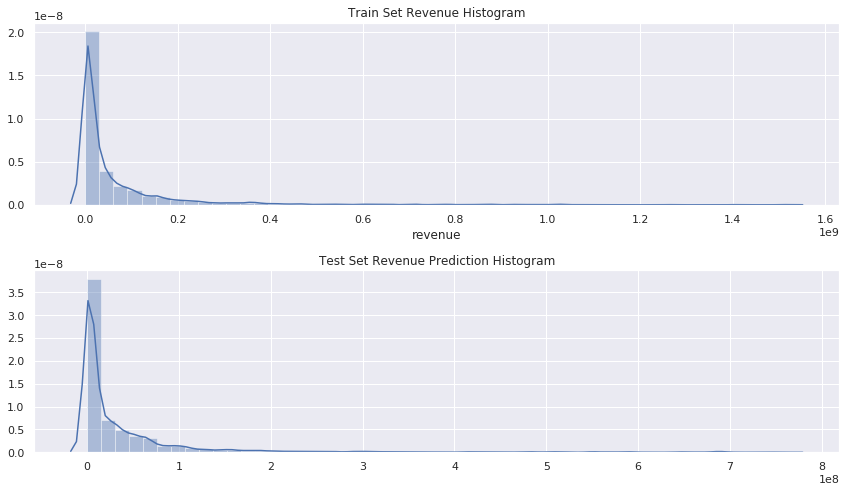

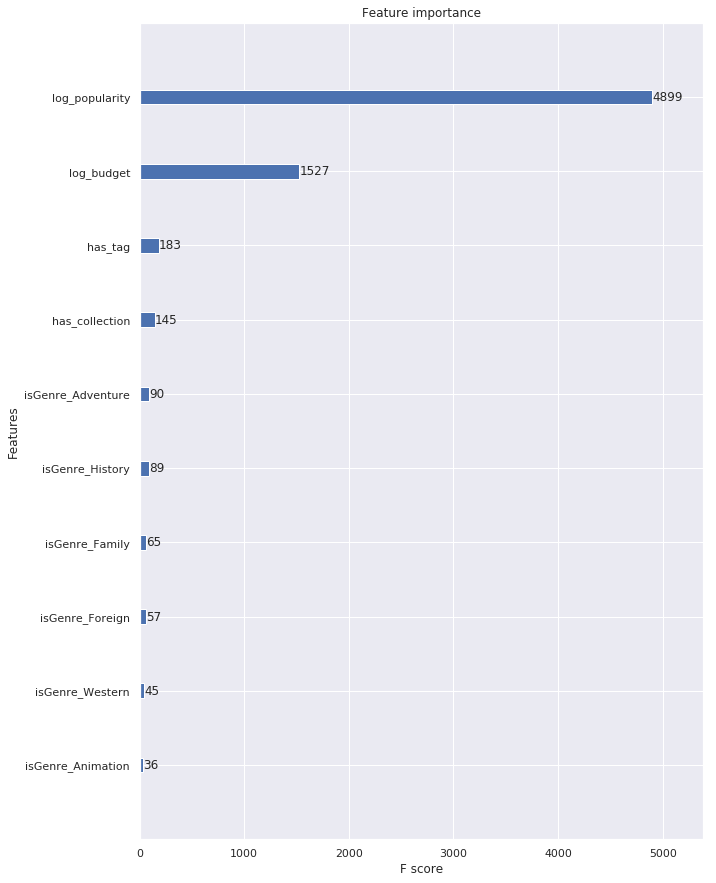

In [111]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_feature_names], y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_test_xgb_fs = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = 5
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    
    clf_stra_fs_xgb = xgb.XGBRegressor(n_estimators=10000, seed=42, nthread = -1)

    clf_stra_fs_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_fs_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    oof_rmse += rmse_valid

    predictions_test_xgb_fs += clf_stra_fs_xgb.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_xgb_fs = np.expm1(predictions_test_xgb_fs)
print(predictions_test_xgb_fs)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb_fs, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_fs_xgb)

### Tuning with feature Selection

In [112]:
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: 0.4169
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 9.32935130848986, 'learning_rate': 0.32264159755217825, 'max_delta_step': 7, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 87, 'reg_alpha': 0.31141867792614114, 'reg_lambda': 6.513136724634089, 'scale_pos_weight': 0.5544643023916863, 'subsample': 0.13556548021189216}

Model #2
Best score: 0.4457
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 3.041066997742908, 'learning_rate': 0.9517116675273961, 'max_delta_step': 9, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.6393718108603786, 'reg_lambda': 9.539453486878958, 'scale_pos_weight': 0.6336020558163782, 'subsample': 0.9923710598637134}

Model #3
Best score: 0.4457
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 3.041066997742908, 'learning_rate': 0.951711667527

### XGBoost training with Feature Selection and tuning


Fold: 0

[0]	validation_0-rmse:12.7861	validation_1-rmse:12.7153
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.922	validation_1-rmse:2.12831
[200]	validation_0-rmse:1.72025	validation_1-rmse:2.20896
[300]	validation_0-rmse:1.5817	validation_1-rmse:2.26351
[400]	validation_0-rmse:1.47547	validation_1-rmse:2.28842
[500]	validation_0-rmse:1.38387	validation_1-rmse:2.33362
[600]	validation_0-rmse:1.30985	validation_1-rmse:2.35309
[700]	validation_0-rmse:1.24614	validation_1-rmse:2.39032
[800]	validation_0-rmse:1.19133	validation_1-rmse:2.41231
[900]	validation_0-rmse:1.14738	validation_1-rmse:2.43872
[1000]	validation_0-rmse:1.10571	validation_1-rmse:2.45104
Stopping. Best iteration:
[50]	validation_0-rmse:2.07015	validation_1-rmse:2.08518


Fold: 1

[0]	validation_0-rmse:12.7532	validation_1-rmse:12.8396
Multiple eval metrics have been passed: 'vali

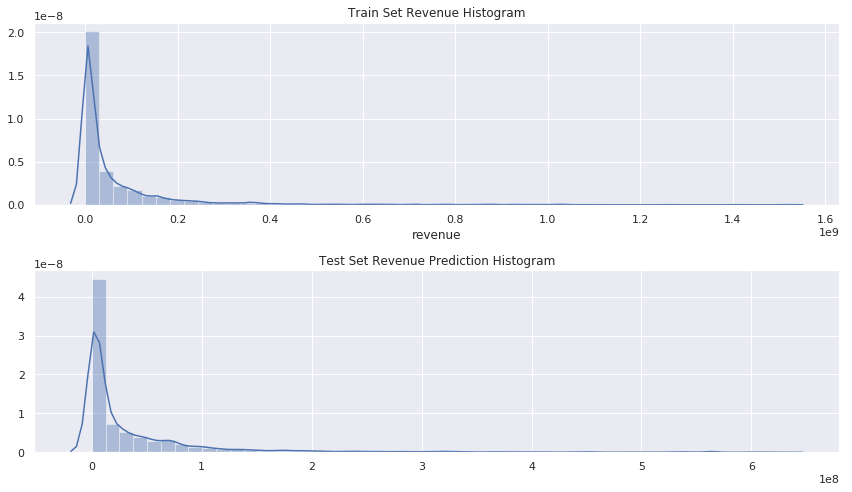

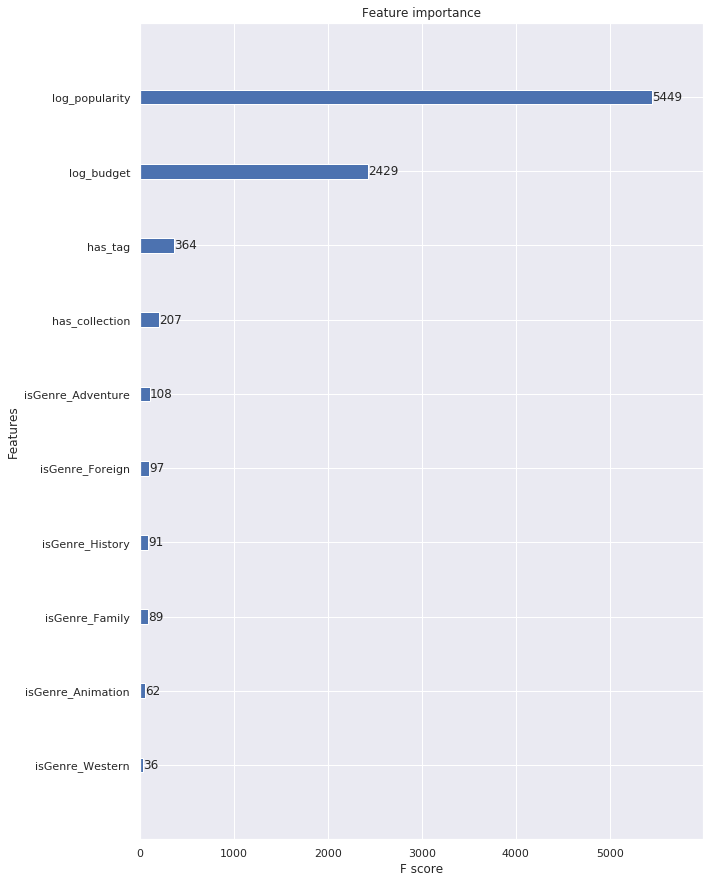

In [113]:
from sklearn.model_selection import train_test_split, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_feature_names], y, random_state=42, test_size=0.3)

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_test_xgb_fs_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = 5
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    
    clf_stra_fs_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                    gamma=result.best_params_["gamma"],                 
                                    learning_rate=result.best_params_["learning_rate"],
                                    max_depth=result.best_params_["max_depth"],
                                    min_child_weight=result.best_params_["min_child_weight"],
                                    n_estimators=10000,
                                    reg_alpha=result.best_params_["reg_alpha"],
                                    reg_lambda=result.best_params_["reg_lambda"],
                                    subsample=result.best_params_["subsample"],
                                    seed=42,
                                    nthread = -1)

    clf_stra_fs_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_fs_tuned_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    oof_rmse += rmse_valid

    predictions_test_xgb_fs_tuned += clf_stra_fs_tuned_xgb.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_xgb_fs_tuned = np.expm1(predictions_test_xgb_fs_tuned)
print(predictions_test_xgb_fs_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb_fs_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_fs_tuned_xgb)

## ML Blends

In [114]:
predictions_test_xgb_extra_trees = (0.5 * predictions_test_xgb) + (0.5 * predictions_extra_trees_test)
predictions_test_xgb_random_forest = (0.5 * predictions_test_xgb) + (0.5 * predictions_random_forest_test)
predictions_test_extra_trees_random_forest = (0.5 * predictions_extra_trees_test) + (0.5 * predictions_random_forest_test)

predictions_test_tuned_xgb_extra_trees = (0.5 * predictions_test_xgb_tuned) + (0.5 * predictions_extra_trees_tuned_test)
predictions_test_tuned_xgb_random_forest = (0.5 * predictions_test_xgb_tuned) + (0.5 * predictions_random_forest_tuned_test)
predictions_test_tuned_extra_trees_random_forest = (0.5 * predictions_extra_trees_tuned_test) + (0.5 * predictions_random_forest_tuned_test)

## Preparing for submission

In [115]:
# xgb baseline
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb
submission.to_csv('clf_xgb_baseline.csv', index=False)

# xgb tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_tuned
submission.to_csv('clf_xgb_tuned.csv', index=False)

# extra trees baseline
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_extra_trees_test
submission.to_csv('clf_extra_trees_baseline.csv', index=False)

# extra trees tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_extra_trees_tuned_test
submission.to_csv('clf_extra_trees_tuned.csv', index=False)

# xgb baseline with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs
submission.to_csv('clf_xgb_fs_baseline.csv', index=False)

# xgb tuning with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_tuned
submission.to_csv('clf_xgb_fs_tuned.csv', index=False)

# Blend 1
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_extra_trees
submission.to_csv('blend_xgb_extra_trees_baselines.csv', index=False)

# Blend 2
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_random_forest
submission.to_csv('blend_xgb_random_forest_baselines.csv', index=False)

# Blend 3
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_extra_trees_random_forest
submission.to_csv('blend_extra_trees_random_forest_baselines.csv', index=False)

# Blend 4
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_xgb_extra_trees
submission.to_csv('blend_xgb_extra_trees_tuned.csv', index=False)

# Blend 5
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_xgb_random_forest
submission.to_csv('blend_xgb_random_forest_tuned.csv', index=False)

# Blend 6
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_extra_trees_random_forest
submission.to_csv('blend_extra_trees_random_forest_tuned.csv', index=False)